# **PROJECT DATA ANALYST - TELECOM CHURN ANALYSIS**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member**          - Pham Trong Quan

# **Project Summary**

Telecom companies often struggle with customer churn, which refers to the number of customers who leave the company over a given period. In this project, we aimed to analyze the churn rate of a telecom company and identify the factors that contribute to customer churn.

# **Problem Statement**

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

# **1.Know the Data**

### Import Libraries

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Import Dataset

In [215]:
# Read the file csv from folder ChurnRate
file_path_20 = 'D:\Data Analyst\PROJECT_DA\PROJECT_TelecomChurn\ChurnRate\churn-bigml-20.csv'
file_path_80 = 'D:\Data Analyst\PROJECT_DA\PROJECT_TelecomChurn\ChurnRate\churn-bigml-80.csv'

df_20=pd.read_csv(file_path_20,sep=',')
df_80=pd.read_csv(file_path_80,sep=',')

# Merge the data from both file csv 
merge_df= pd.concat([df_20,df_80],ignore_index=True)

# create a new Csv file with name churn-bigml
output_file_path= 'D:\Data Analyst\PROJECT_DA\PROJECT_TelecomChurn\ChurnRate\churn-bigml.csv'
merge_df.to_csv(output_file_path, index=False)

### Dataset First View

In [216]:
df = pd.read_csv('D:\Data Analyst\PROJECT_DA\PROJECT_TelecomChurn\ChurnRate\churn-bigml.csv',sep=',')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Dataset Rows & Columns counts


In [217]:
df.shape

(3333, 20)

#### Dataset Information

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Check Duplicate Values

In [219]:
df.duplicated().sum()

0

#### Check Missing/Null Values

In [220]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<Axes: >

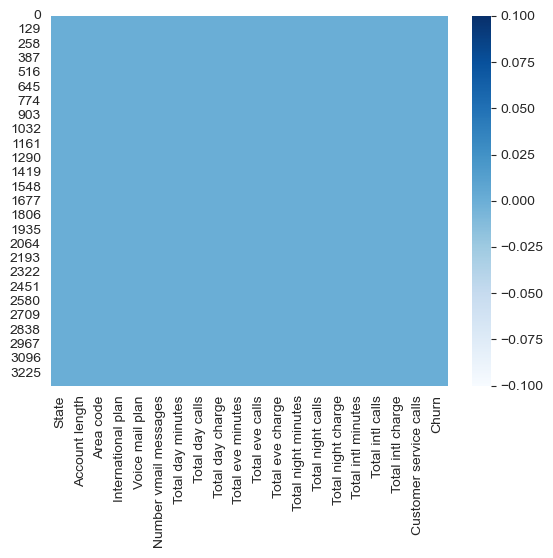

In [221]:
# Visualization the missing values
sns.heatmap(df.isnull(),cmap='Blues')

### What did you know about your dataset ?
 - The given dataset is from telecom industry. This dataset consists of 3333 rows and 20 columns of customer activity data as Area code, plan details, call details along with churn labels specifying whether the customer cancelled the subscription. There is no missing and duplicate values in the dataset.

# **2. Understanding The Variables**

In [222]:
# Display List Columns
columns_name = df.columns.to_list()
print(columns_name)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


### Description Variables in Dataset

* **State :**                All 51 states

* **Account Length       :** How long account has been active

* **Area Code            :** Code Number of Area

* **lntl Plan            :** International plan activated ( yes, no )

* **VMail Plan           :** Voice Mail plan activated ( yes ,no )

* **VMail Message        :** No.of voice mail messages

* **Day Mins             :** Total day minutes used

* **Day calls**         : Total day calls made

* **Day Charge**         : Total day charge

* **Eve Mins**          : Total evening minutes

* **Eve Calls**          : Total evening calls

* **Eve Charge**         : Total evening charge

* **Night Mins**         : Total night minutes

* **Night Calls**        : Total night calls

* **Night Charge**      : Total night charge

* **Intl Mins**         : Total International minutes used

* **Intl Calls**         : Total International calls made

* **Intl Charge**        : Total International charge

* **CustServ calls**    : Number of customer service calls made

* **Churn**             : Customer churn (Target Variable True=1, False=0)

In [223]:
# Description Dataset
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Check Unique Values for each variable

In [224]:
# Check unique values for each variable
for i in df.columns:
    print('The unique values in',i,'is', df[i].nunique())

The unique values in State is 51
The unique values in Account length is 212
The unique values in Area code is 3
The unique values in International plan is 2
The unique values in Voice mail plan is 2
The unique values in Number vmail messages is 46
The unique values in Total day minutes is 1667
The unique values in Total day calls is 119
The unique values in Total day charge is 1667
The unique values in Total eve minutes is 1611
The unique values in Total eve calls is 123
The unique values in Total eve charge is 1440
The unique values in Total night minutes is 1591
The unique values in Total night calls is 120
The unique values in Total night charge is 933
The unique values in Total intl minutes is 162
The unique values in Total intl calls is 21
The unique values in Total intl charge is 162
The unique values in Customer service calls is 10
The unique values in Churn is 2


# **3. Data Wrangling**

### Wrangling Data

In [225]:
# Total the customers churn
print('The customers churning:',df[df['Churn']==True].Churn.count())

# Total the unique area code
print('The unique area code:',df['Area code'].nunique())

# List the unique area code
print('List unique area code include:',df['Area code'].unique())

# Customers activated Voice mail plan
print('Number of customers registered/actived Voice mail plan',df[df['Voice mail plan'] == 'Yes']['Voice mail plan'].count())

# Customers activated International plan
print('Number of customers registered/actived International plan:',df[df['International plan'] == 'Yes']['International plan'].count())

The customers churning: 483
The unique area code: 3
List unique area code include: [408 415 510]
Number of customers registered/actived Voice mail plan 922
Number of customers registered/actived International plan: 323


In [226]:
# Define the list of columns to calculate the total value
columns_to_sum = ['Total day minutes', 'Total day calls', 'Total day charge',
                  'Total eve minutes', 'Total eve calls', 'Total eve charge',
                  'Total night minutes', 'Total night calls', 'Total night charge',
                  'Total intl minutes', 'Total intl calls', 'Total intl charge']

# Calculate the total value for each column
total_values = df[columns_to_sum].sum()

# Print 
print("Total values for each column:")
print(total_values)


Total values for each column:
Total day minutes      599190.40
Total day calls        334752.00
Total day charge       101864.17
Total eve minutes      669867.50
Total eve calls        333681.00
Total eve charge        56939.44
Total night minutes    669506.50
Total night calls      333659.00
Total night charge      30128.07
Total intl minutes      34120.90
Total intl calls        14930.00
Total intl charge        9214.35
dtype: float64


In [227]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [228]:
# Calculate and display the quantity of "True" values in the "Churn" column
churn_true_count = df['Churn'].value_counts().get(True,0)

print('Number of Customers churning:',churn_true_count)

churn_true_df = df[df['Churn']==True]
churn_true_df

Number of Customers churning: 483


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
14,LA,155,415,No,No,0,203.4,100,34.58,190.9,104,16.23,196.0,119,8.82,8.9,4,2.40,0,True
16,ID,77,415,No,No,0,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,9.8,7,2.65,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,MI,119,510,Yes,Yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,True
3308,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3323,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3324,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [229]:
# Calculate and display the quantity of "False" values in the "Churn" column
churn_false_count = df['Churn'].value_counts().get(False, 0)

print('Number of Customers not churn:',churn_false_count)

churn_false_df = df[df['Churn']==False]
churn_false_df

Number of Customers not churn: 2850


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [230]:
# Percentage of total customers churning
per_churn_true = (churn_true_df.Churn.count()/df.Churn.count()) * 100
print(f'Percentage of customer churning:{round(per_churn_true,2)}%')

Percentage of customer churning:14.49%


In [231]:
# Percentage of total customers not churn
per_churn_false = (churn_false_df.Churn.count()/df.Churn.count())*100
print(f'Percentage of customer not churn:{round(per_churn_false,2)}%')

Percentage of customer not churn:85.51%


In [232]:
# List state in 'State' columns
df['State'].unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [233]:
state_churn_counts = df.groupby(['State', 'Churn'])['Churn'].value_counts().unstack(fill_value=0)
state_churn_counts
# groupby data from columns State, Churn => choice Churn column and use value_counts() to count a number of value => a series
# unstack() change a series => a dataframe ; fill_value = 0 used to fill in NaN values (if any) when unstacking

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [234]:
# The 10 states with the lowest and highest average customer churn

state_churn_perc = ((df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").round(3))
state_churn_perc.tail(10)

,State,Average True Churn
41,RI,9.231
42,WI,8.974
43,IL,8.621
44,NE,8.197
45,LA,7.843
46,IA,6.818
47,VA,6.494
48,AZ,6.250
49,AK,5.769
50,HI,5.660


In [235]:
state_churn_perc.head(10)

,State,Average True Churn
0,NJ,26.471
1,CA,26.471
2,TX,25.000
3,MD,24.286
4,SC,23.333
5,MI,21.918
6,MS,21.538
7,NV,21.212
8,WA,21.212
9,ME,20.968


In [236]:
# Account length wise churn data
acc_len_churn = df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
# print(acc_len_churn['Account length'].unique())
# print(acc_len_churn['values'].unique())
acc_len_churn

Account length    39559
Churn               164
values             3333
dtype: int64


,Account length,Churn,values
0,1,False,7
1,1,True,1
2,2,True,1
3,3,False,5
4,4,False,1
...,...,...,...
368,224,True,1
369,225,False,1
370,225,True,1
371,232,False,1


In [237]:
# Account length wise churn data
acc_len_churn_true = churn_true_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn_true.sum())
# print(acc_len_churn_true['values'].unique())
acc_len_churn_true

Account length    17028
Churn               164
values              483
dtype: int64


,Account length,Churn,values
0,1,True,1
1,2,True,1
2,12,True,1
3,13,True,1
4,16,True,1
...,...,...,...
159,208,True,1
160,209,True,1
161,212,True,1
162,224,True,1


In [238]:
# Area code wise churn count
Area_code_churn = df.groupby(['Area code'])['Churn'].value_counts().reset_index()
Area_code_churn

,Area code,Churn,count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


In [239]:
# Area code wise churn Percentage
Area_code_churn_perc = df.groupby(['Area code'])['Churn'].mean().mul(100).round(2).reset_index(name='Perc')
Area_code_churn_perc

,Area code,Perc
0,408,14.56
1,415,14.26
2,510,14.88


In [240]:
#Poor Connectivity by intersection of state by area code
Area_state = df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state

,Area code,Unique state
0,408,"[LA, AK, VA, KY, ID, CA, WA, OH, NH, AZ, FL, K..."
1,415,"[IN, NY, SC, MI, ID, WI, HI, MN, LA, MT, MA, C..."
2,510,"[HI, MN, VT, MI, MO, AL, TX, WY, NM, SC, OK, O..."


In [241]:
#Poor connectivity due to intersection of state by area code with churn rate is true
Area_state_churn = churn_true_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

,Area code,Unique state
0,408,"[KS, SD, RI, IN, MS, ME, OK, MT, VA, SC, MA, W..."
1,415,"[IN, NY, ID, LA, CT, FL, OR, AL, MO, NV, WI, M..."
2,510,"[TX, MN, OK, WI, VT, WV, CA, UT, NJ, DE, MT, A..."


In [242]:
# Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0,'Unique state']
Area_415_state_churn = Area_state_churn.loc[1,'Unique state']
Area_510_state_churn = Area_state_churn.loc[2,'Unique state']

inter_1= set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives {len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")
# print(Area_408_state_churn)

Intersection by different areas code of churning gives 38 poor connectivity states
Try to short down the list of state by different dataset to generate more precise poor connectivity states


In [243]:
#  Calculate the quantity of "International plan" with 2 values: Yes and No in the "Churn" column
churn_counts_intp = df.groupby(['International plan','Churn'])['Churn'].value_counts().unstack(fill_value=0)
churn_counts_intp

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


In [244]:
# Total number of Customers churning with international plan
churn_intl_yes = churn_true_df[churn_true_df['International plan']=='Yes']
print(f"No of Customers churning having International plan is {churn_intl_yes['International plan'].value_counts()[0]}")

# Total number of Customers churning without international plan
churn_intl_no = churn_true_df[churn_true_df['International plan']=='No']
print(f"No of Customers churning without having International plan is {churn_intl_no['International plan'].value_counts()[0]}")

No of Customers churning having International plan is 137
No of Customers churning without having International plan is 346


In [245]:
#  Calculate the quantity of "Voice Mail plan" with 2 values: Yes and No in the "Churn" column
churn_counts_vmp = df.groupby(['Voice mail plan','Churn'])['Churn'].value_counts().unstack(fill_value=0)
churn_counts_vmp

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


In [246]:
# Total number of Customers churning with Voice mail plan
churn_vmp_yes = churn_true_df[churn_true_df['Voice mail plan']=='Yes']
print(f"No of Customers churning having Voice mail plan is {churn_vmp_yes['Voice mail plan'].value_counts()[0]}")

# Total number of Customers churning without Voice mail plan
churn_vmp_no = churn_true_df[churn_true_df['Voice mail plan']=='No']
print(f"No of Customers churning without having Voice mail plan is {churn_vmp_no['Voice mail plan'].value_counts()[0]}")

No of Customers churning having Voice mail plan is 80
No of Customers churning without having Voice mail plan is 403


In [247]:
churn_true_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
14,LA,155,415,No,No,0,203.4,100,34.58,190.9,104,16.23,196.0,119,8.82,8.9,4,2.40,0,True
16,ID,77,415,No,No,0,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,9.8,7,2.65,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,MI,119,510,Yes,Yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,True
3308,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3323,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3324,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [248]:
# Customers churning having both International plan and Voice mail plan
intp_vmail_yes = churn_true_df[(churn_true_df['International plan'] == 'Yes') & (churn_true_df['Voice mail plan'] == 'Yes')]
if len(intp_vmail_yes) > 0:
    print(f"No of Customers churning having intp and vmail plan are {intp_vmail_yes['Churn'].value_counts().get(True, 0)}")
else:
    print("No customers churning with both intp plan and vmail plan.")

# Customers churning don't have both International plan and Voice mail plan
intp_vmail_no = churn_true_df[(churn_true_df['International plan'] == 'No') & (churn_true_df['Voice mail plan'] == 'No')]
if len(intp_vmail_no) > 0:
    print(f"No of Customers churning having no intp plan and no vmail plan are {intp_vmail_no['Churn'].value_counts().get(True, 0)}")
else:
    print("No customers churning with neither intp plan nor vmail plan.")

# Customers churning having International plan but no Voice mail plan
intp_yes_vmail_no = churn_true_df[(churn_true_df['International plan'] == 'Yes') & (churn_true_df['Voice mail plan'] == 'No')]
if len(intp_yes_vmail_no) > 0:
    print(f"No of Customers churning having intp plan but no vmail plan are {intp_yes_vmail_no['Churn'].value_counts().get(True, 0)}")
else:
    print("No customers churning with intp plan but no vmail plan.")

# Customers churning don't have International plan but have Voice mail plan
intp_no_vmail_yes = churn_true_df[(churn_true_df['International plan'] == 'No') & (churn_true_df['Voice mail plan'] == 'Yes')]
if len(intp_no_vmail_yes) > 0:
    print(f"No of Customers churning having no intp plan but vmail plan are {intp_no_vmail_yes['Churn'].value_counts().get(True, 0)}")
else:
    print("No customers churning with no intp plan but vmail plan.")


No of Customers churning having intp and vmail plan are 36
No of Customers churning having no intp plan and no vmail plan are 302
No of Customers churning having intp plan but no vmail plan are 101
No of Customers churning having no intp plan but vmail plan are 44


In [249]:
# filtered_df = churn_true_df[(churn_true_df['Churn'] == True) & (churn_true_df['International plan'] == 'Yes') & (churn_true_df['Voice mail plan'] == 'Yes')]

# df_1 = pd.DataFrame(filtered_df)
# df_1.info()

In [250]:
# Poor Connectivity States
# States Sorted with respect to international and voice mail plan
state_intp_vmail_yes=intp_vmail_yes['State'].unique()
state_intp_vmail_no =intp_vmail_no['State'].unique()
state_intp_yes_vmail_no= intp_yes_vmail_no['State'].unique()
state_intp_no_vmail_yes= intp_no_vmail_yes['State'].unique()

# Intersection of 4 types of plan made
inter_1 = set(state_intp_vmail_yes).intersection(set(state_intp_vmail_no))
inter_2 = set(state_intp_yes_vmail_no).intersection(set(state_intp_no_vmail_yes))
Intersection =set(inter_1).intersection(set(inter_2))
print(f"List of poor connectivity states are : {list(Intersection)}")

List of poor connectivity states are : ['MN', 'MA', 'MI', 'GA', 'NC', 'KS', 'SD', 'NJ', 'WV', 'NV']


In [251]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = df.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='vmail_mess').round(3)
vmail_mssg_churn

,Churn,vmail_mess
0,False,8.605
1,True,5.116


In [252]:
# Percentage of people churning with the average day mins,calls and charge.
aver_day_mins = df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='day_mins').round(3)
aver_day_mins

,Churn,day_mins
0,False,175.176
1,True,206.914


In [253]:
# print(churn_true_df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins'))
# print(churn_false_df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins'))

In [254]:
aver_day_calls = df.groupby(['Churn'])['Total day calls'].mean().reset_index(name='day_calls')
aver_day_calls

,Churn,day_calls
0,False,100.283158
1,True,101.335404


In [255]:
aver_day_charge = df.groupby(['Churn'])['Total day charge'].mean().reset_index(name='day_charge')
aver_day_charge

,Churn,day_charge
0,False,29.780421
1,True,35.175921


In [256]:
# Evening Data
# Percentage of people churning with the average Evening mins,calls and charge.
aver_eve_mins = df.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='eve_mins')
aver_eve_mins

,Churn,eve_mins
0,False,199.043298
1,True,212.410145


In [257]:
aver_eve_calls = df.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='eve_calls')
aver_eve_calls

,Churn,eve_calls
0,False,100.038596
1,True,100.561077


In [258]:
aver_eve_charge = df.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='eve_charge')
aver_eve_charge

,Churn,eve_charge
0,False,16.918909
1,True,18.054969


In [259]:
# Night Data
# Percentage of people churning with the average Night mins,calls and charge.
aver_night_mins = df.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='night_mins')
aver_night_mins

,Churn,night_mins
0,False,200.133193
1,True,205.231677


In [260]:
aver_night_calls = df.groupby(['Churn'])['Total night calls'].mean().reset_index(name='night_calls')
aver_night_calls

,Churn,night_calls
0,False,100.058246
1,True,100.399586


In [261]:
aver_night_charge = df.groupby(['Churn'])['Total night charge'].mean().reset_index(name='night_charge')
aver_night_charge

,Churn,night_charge
0,False,9.006074
1,True,9.235528


In [262]:
# Intl Call Data
# Percentage of people churning with the average international mins,calls and charge.
aver_intl_mins = df.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='intl_mins')
aver_intl_mins

,Churn,intl_mins
0,False,10.158877
1,True,10.700000


In [263]:
aver_intl_calls = df.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='intl_calls')
aver_intl_calls

,Churn,intl_calls
0,False,4.532982
1,True,4.163561


In [264]:
aver_intl_charge = df.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='intl_charge')
aver_intl_charge

,Churn,intl_charge
0,False,2.743404
1,True,2.889545


In [265]:
# Combining of day,evening and night calls, mins and charges
df['Total calls'] = df.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
df['Total mins'] = df.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
df['Total charge'] = df.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

# mins per call
df['min_per_call'] = df['Total mins']/df['Total calls']

#charge per min
df['charge_per_min'] = df['Total charge']/df['Total mins']

# International mins per call
df['Intl_min_per_call'] = df['Total intl minutes']/df['Total intl calls']

#International charge per min
df['Intl_charge_per_min'] = df['Total intl charge']/df['Total intl minutes']

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,2.35,1,False,267,751.9,70.97,2.816105,0.094388,2.175000,0.270115
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,3.43,4,True,331,566.4,50.77,1.711178,0.089636,2.116667,0.270079
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,1.46,4,True,292,811.3,90.83,2.778425,0.111956,0.600000,0.270370
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,2.08,2,False,310,437.3,38.97,1.410645,0.089115,1.283333,0.270130
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,3.00,1,False,316,513.1,46.60,1.623734,0.090821,11.100000,0.270270


In [266]:
# Customer Service Call data
# print(df['Customer service calls'].unique())
print("No of unique service calls made :", df['Customer service calls'].nunique())

# Percentage of churning based on the customer service calls made
per_churn_scalls = pd.DataFrame((df.groupby(['Customer service calls'])['Churn'].mean()*100).reset_index(name='Perc_churned'))
per_churn_scalls

No of unique service calls made : 10


,Customer service calls,Perc_churned
0,0,13.199426
1,1,10.330229
2,2,11.462451
3,3,10.256410
4,4,45.783133
5,5,60.606061
6,6,63.636364
7,7,55.555556
8,8,50.000000
9,9,100.000000


In [267]:
# Calculate churn rates for each number of customer service calls
churn_scalls = df.groupby('Customer service calls')['Churn'].value_counts().unstack(fill_value=0)
churn_scalls

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


### *What all manipulations have you done and insights you found?*

In data wrangling the first thing we did is to find out how customers have churn and how many are not and their rate. We know that plotting charts will give us more visual representation. So from this we got to know that there are ~14.5 % churn customers are there.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1 : Visualization of Dependent Variable - The overall Churn

Total the customer churn: 483
Total the customers not churn: 2850


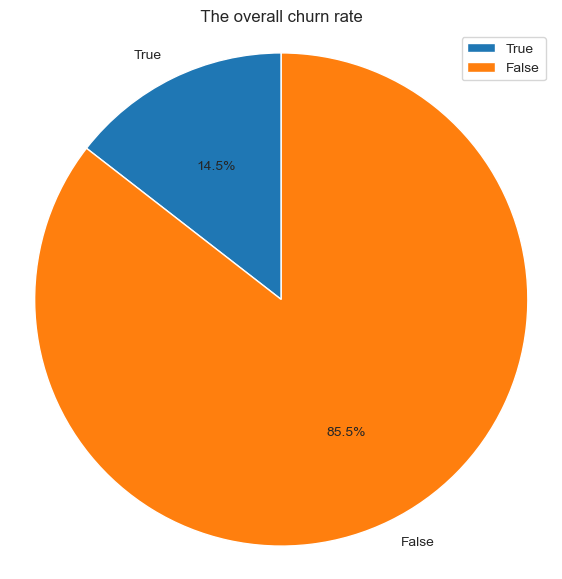

In [268]:
# Chart - 1  Dependent Column Value Counts
print('Total the customer churn:', churn_true_count)
print('Total the customers not churn:',churn_false_count)

# Data to plot
labels = ['True', 'False'] # List have labels
sizes = [churn_true_count, churn_false_count] # List have values

# Plotting & Add Title and labels
plt.figure(figsize=(7, 7)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(' The overall churn rate ') 
plt.axis('equal') # x axis = y axis

# Add legend in the upper right
plt.legend(loc='upper right') 

# Show plot
plt.show()

##### *1. Why did you pick the specific chart?*
- Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole. They are an effective way to display proportions or percentages of data in a simple and visually appealing way.

##### *2. What is the insight found from the chart?*
- From the above chart we got to know that, there are 2850 customers which are not churned which is 85.5% of the whole customers data given in the dataset. In other hand, 483 customers are churned which is 14.5 % of the whole customers data given in the dataset.

- 14.5% of customers churn, which may look like a small number, but this number could change negatively in the future. Therefore, immediate action is needed.

##### *3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.?*

- In an ideal world, the customer churn rate for company in the telecommunications industry is between 15% and 20%. Of these, we have a churn rate of 14.5%, which is not high, but customer churn is still bad for business.

- Losing customers is easy but gaining customers is very difficult. One customer churn will eliminate 3-4 customers which your telecommunications service provider can reduce the customer churn rate in many different ways

- So, certainly insight into churn rate will be very useful for further decisions.

### Chart - 2 : Column wise Histogram and Box Plot 

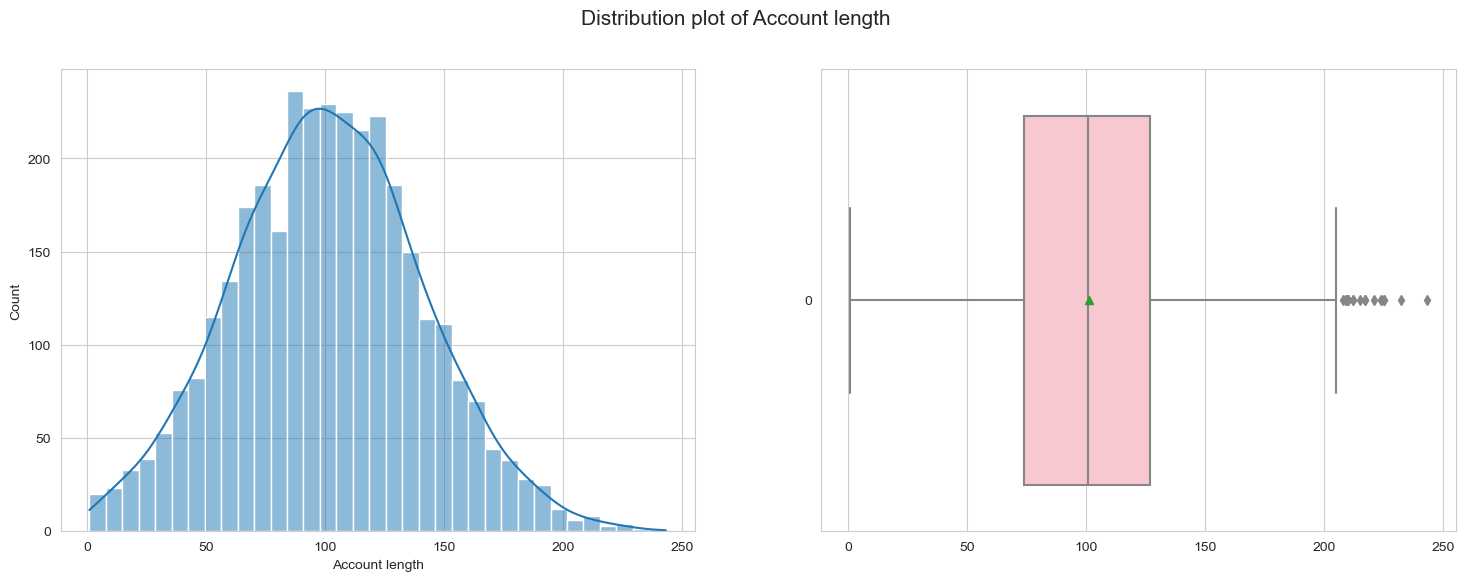

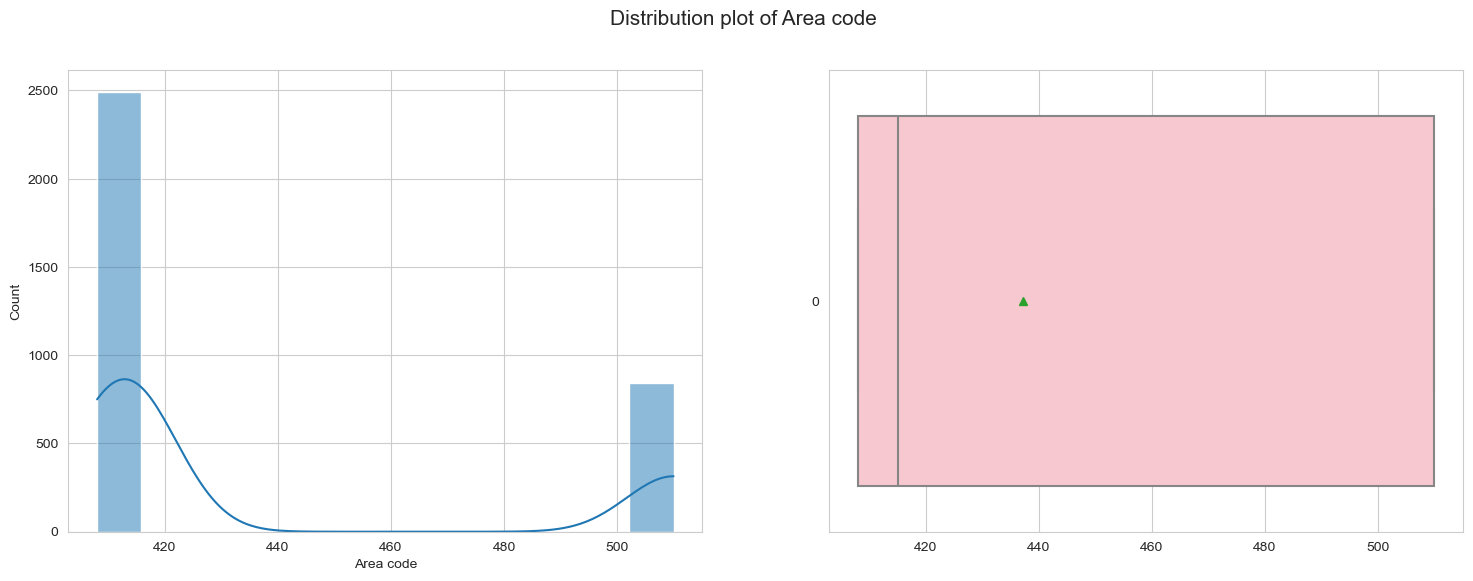

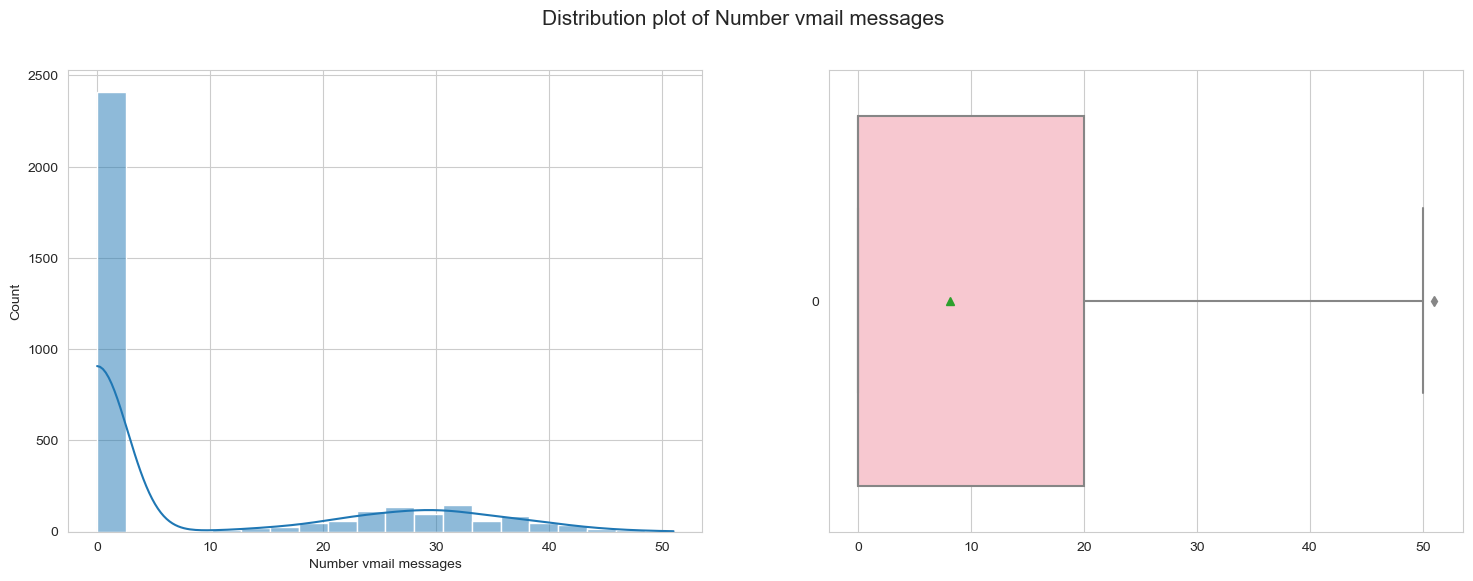

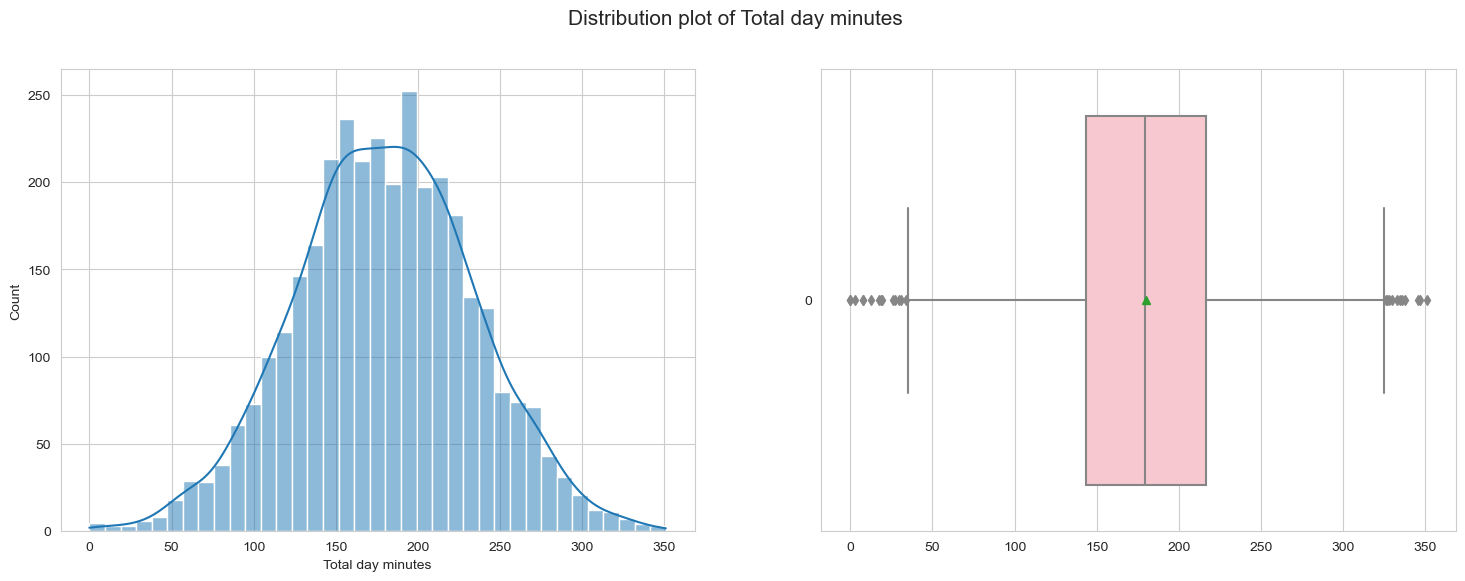

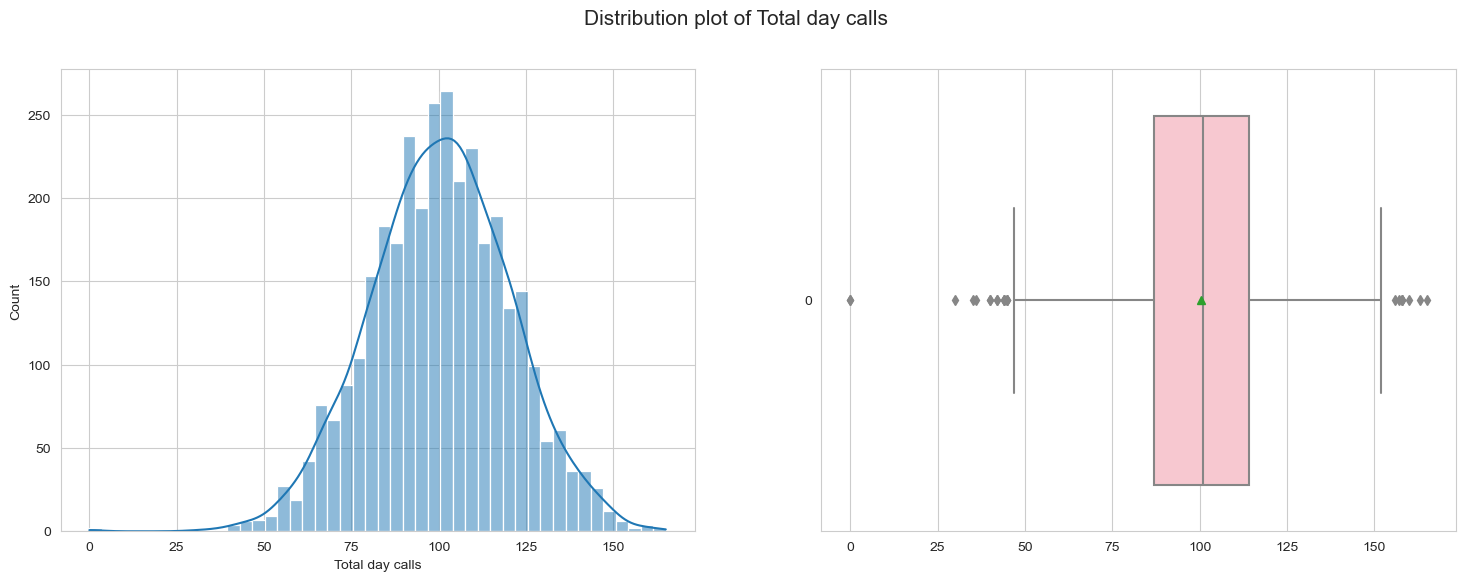

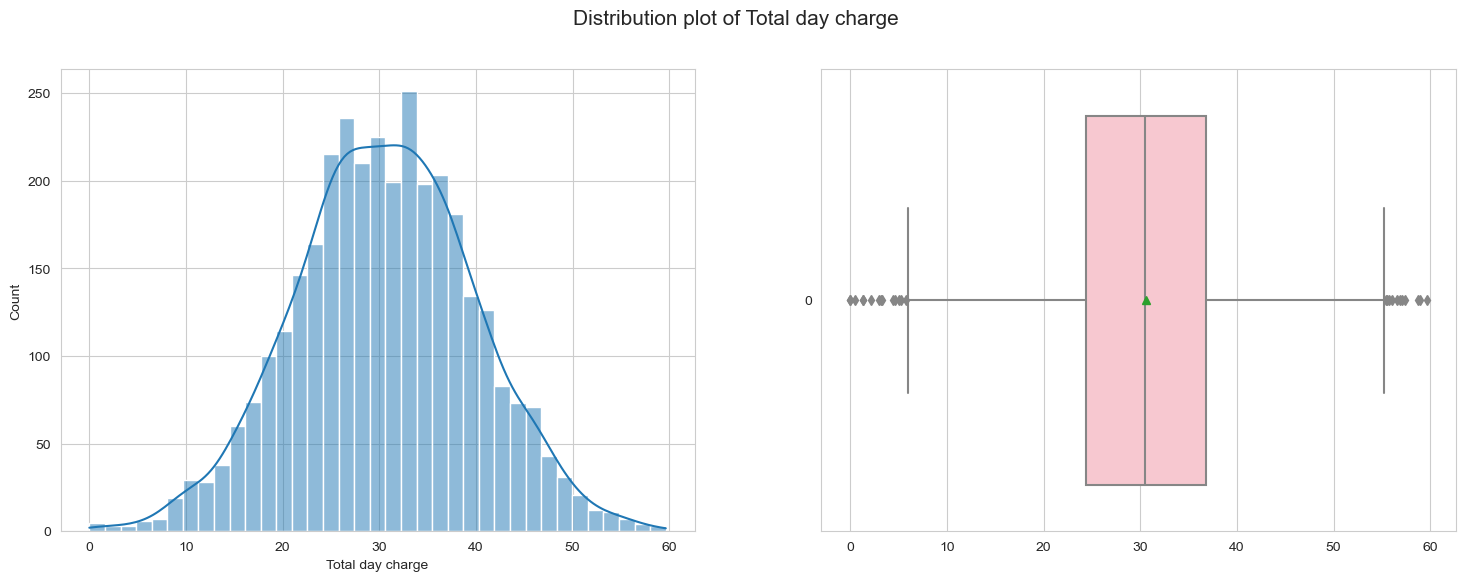

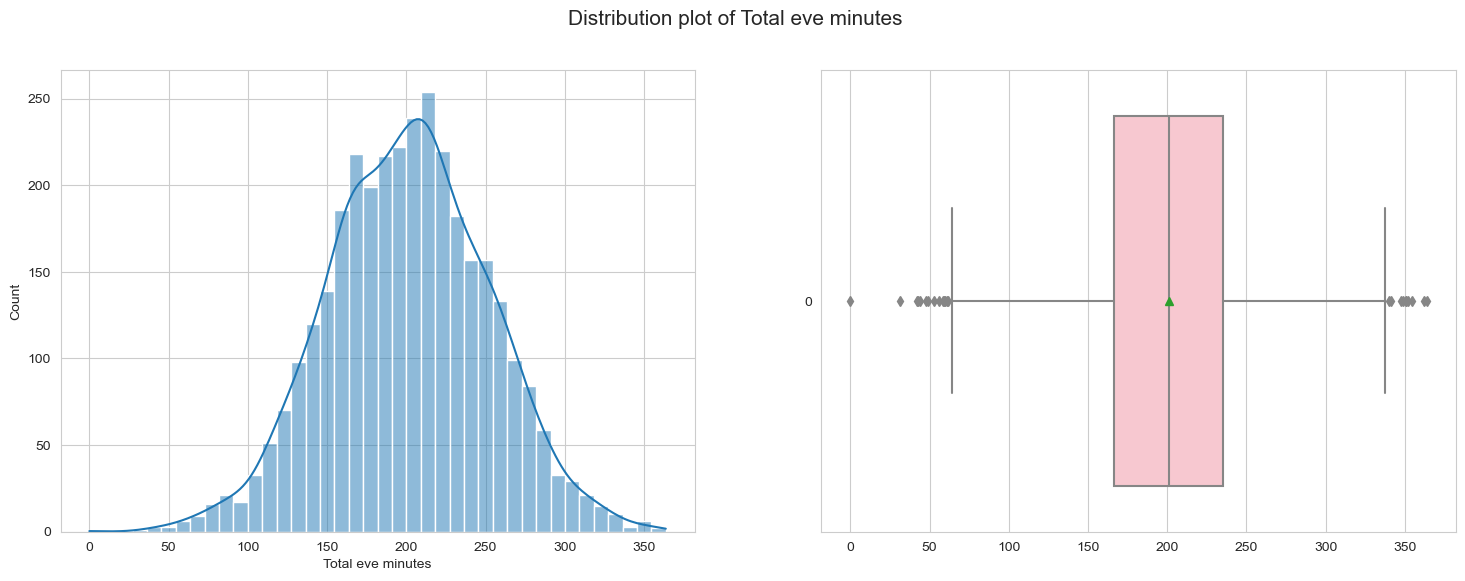

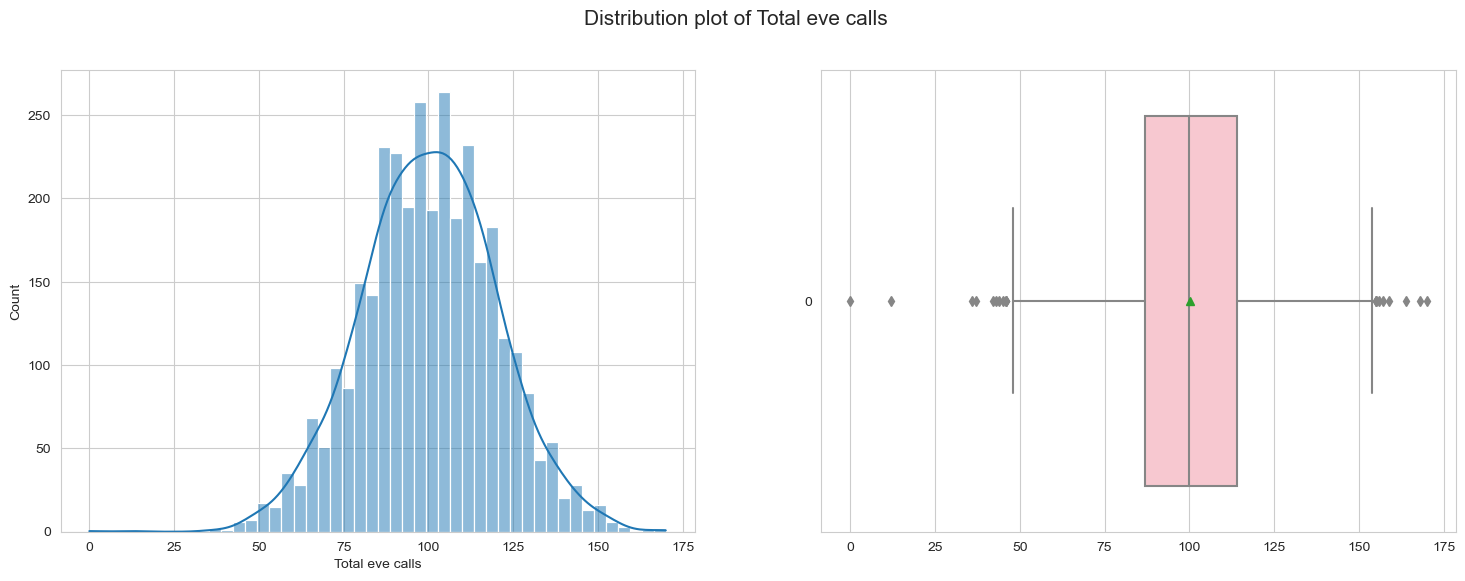

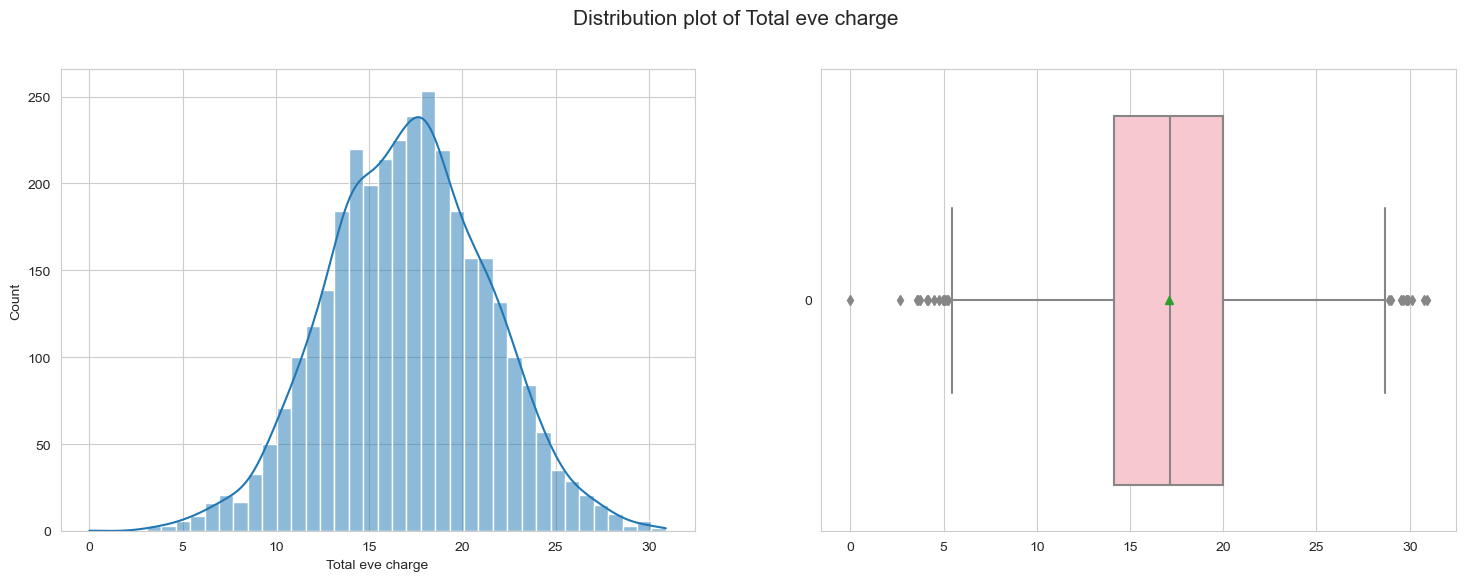

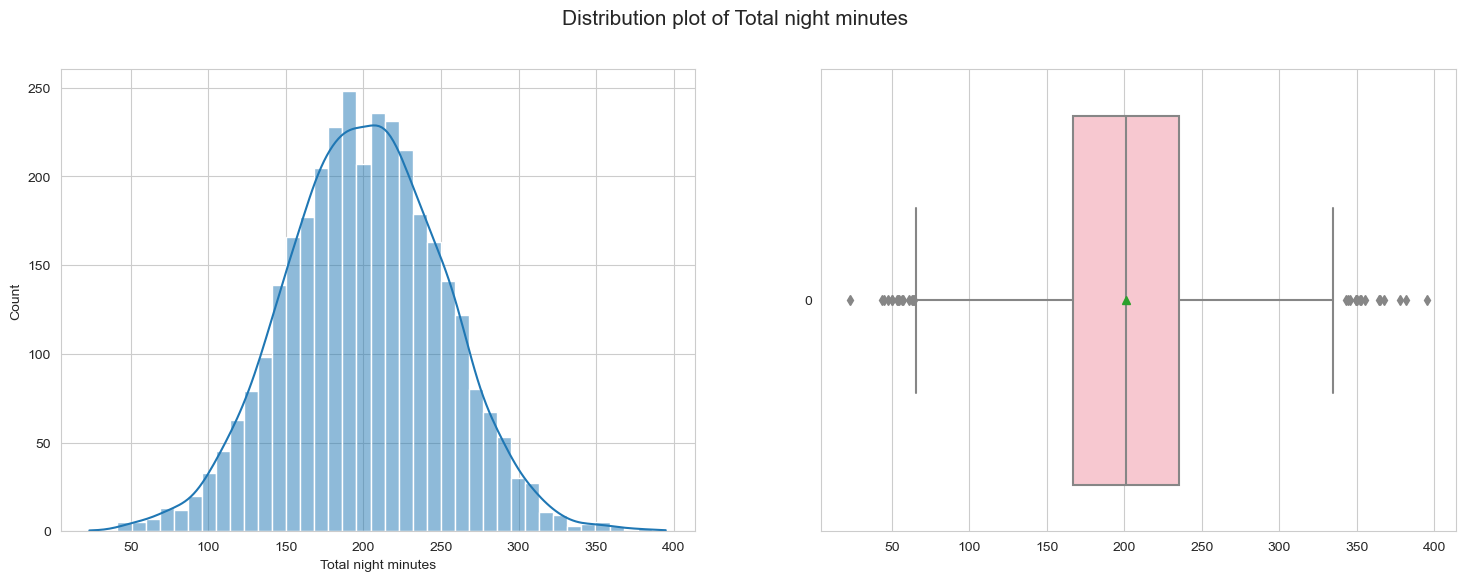

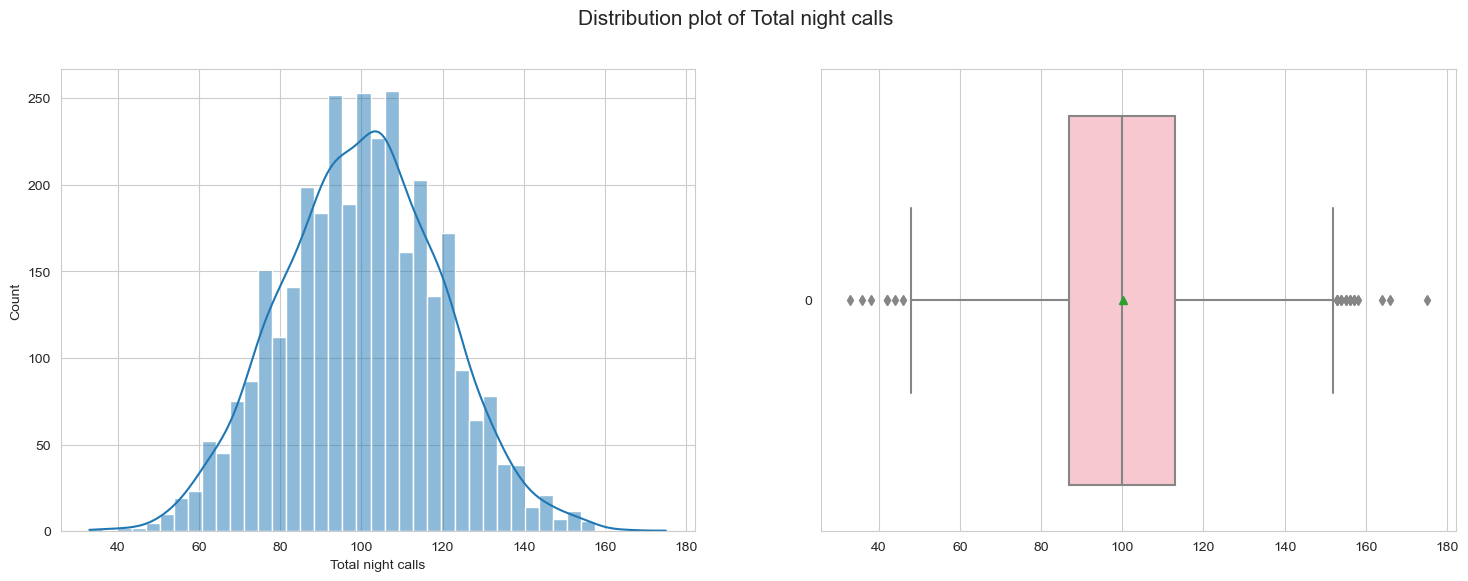

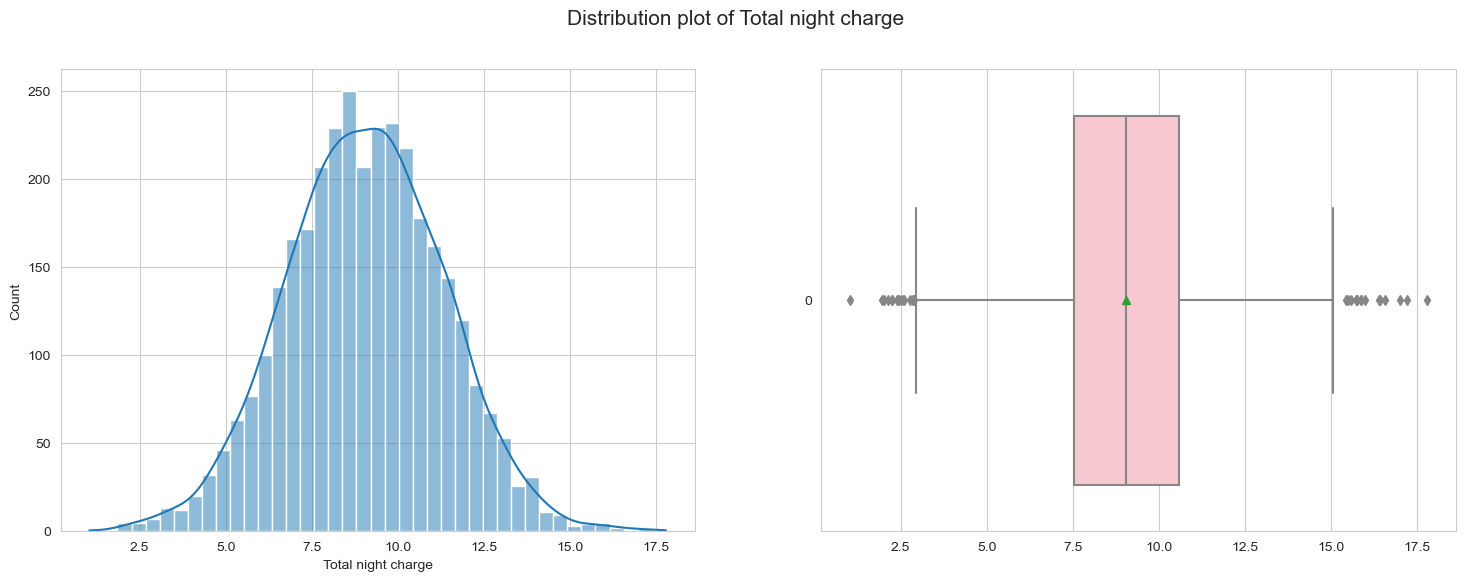

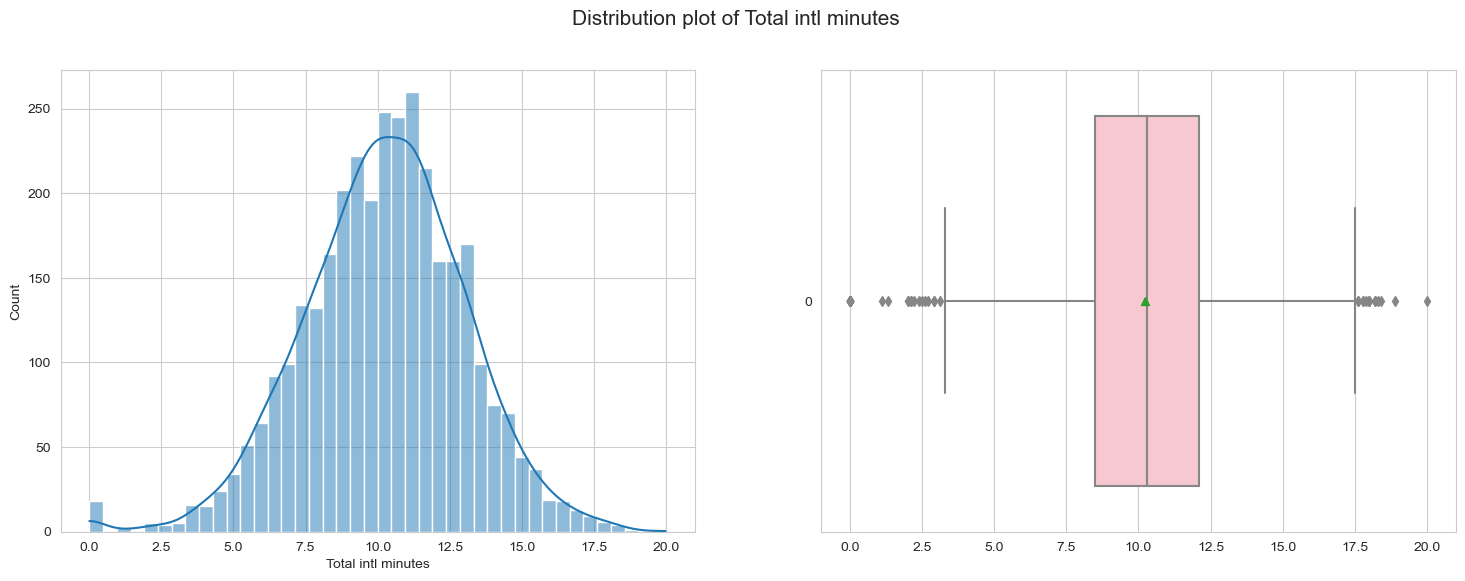

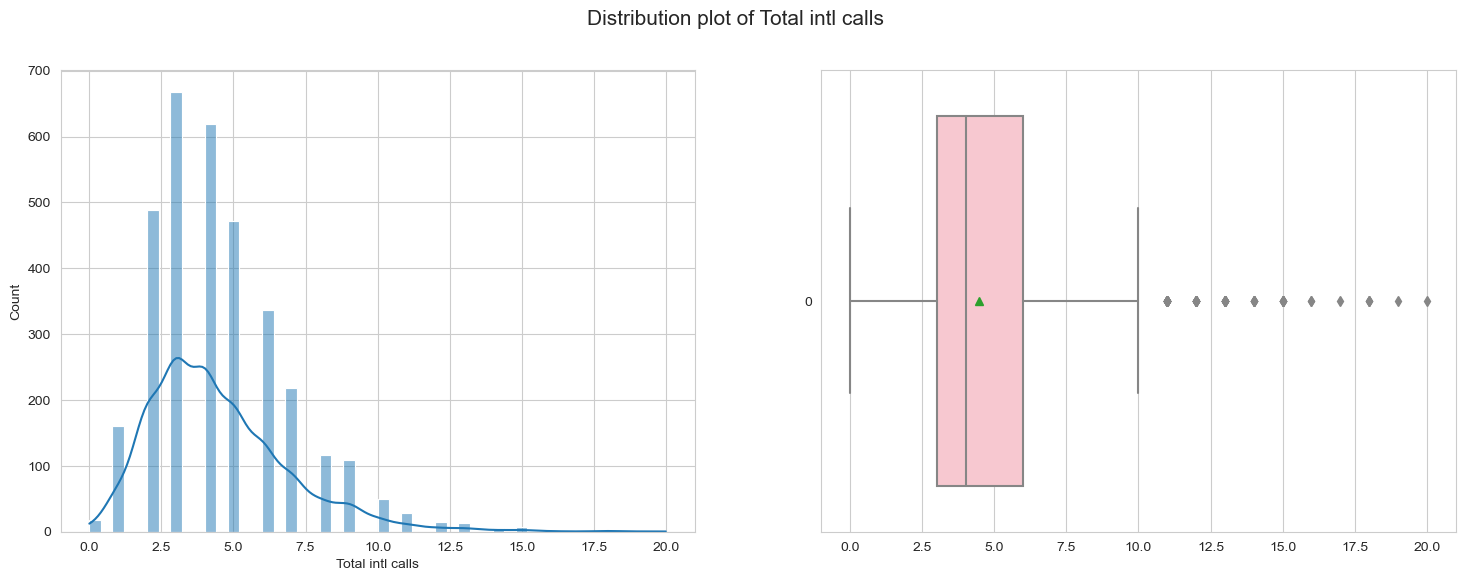

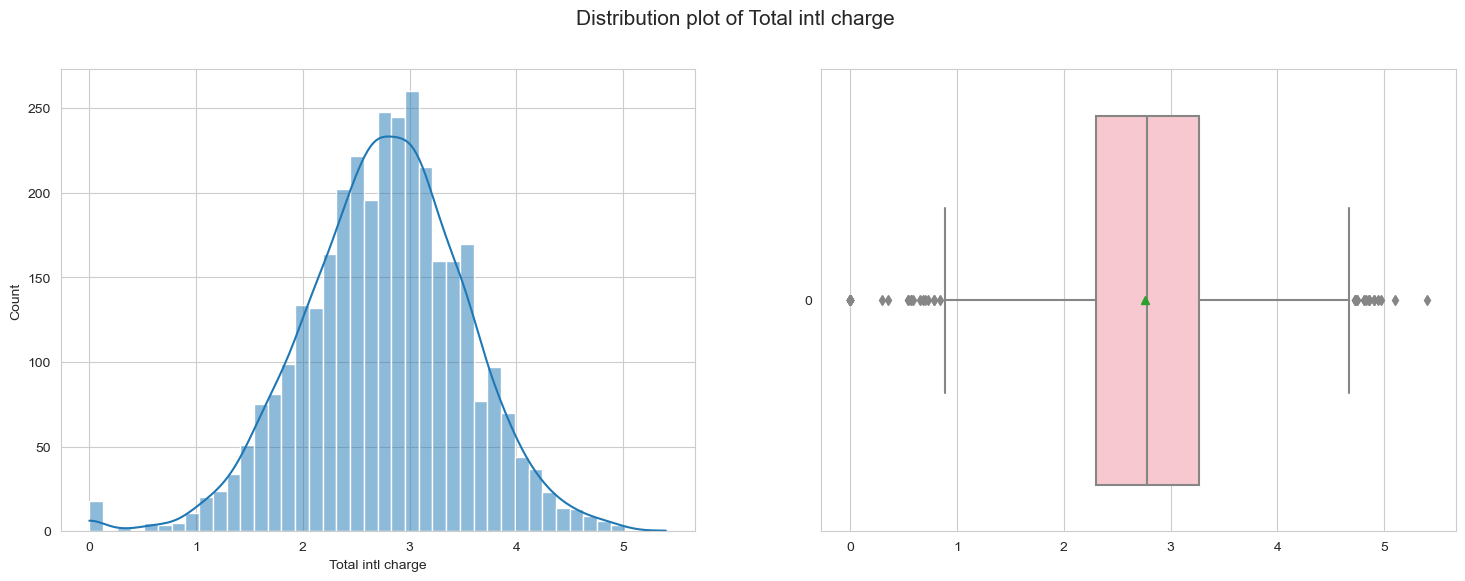

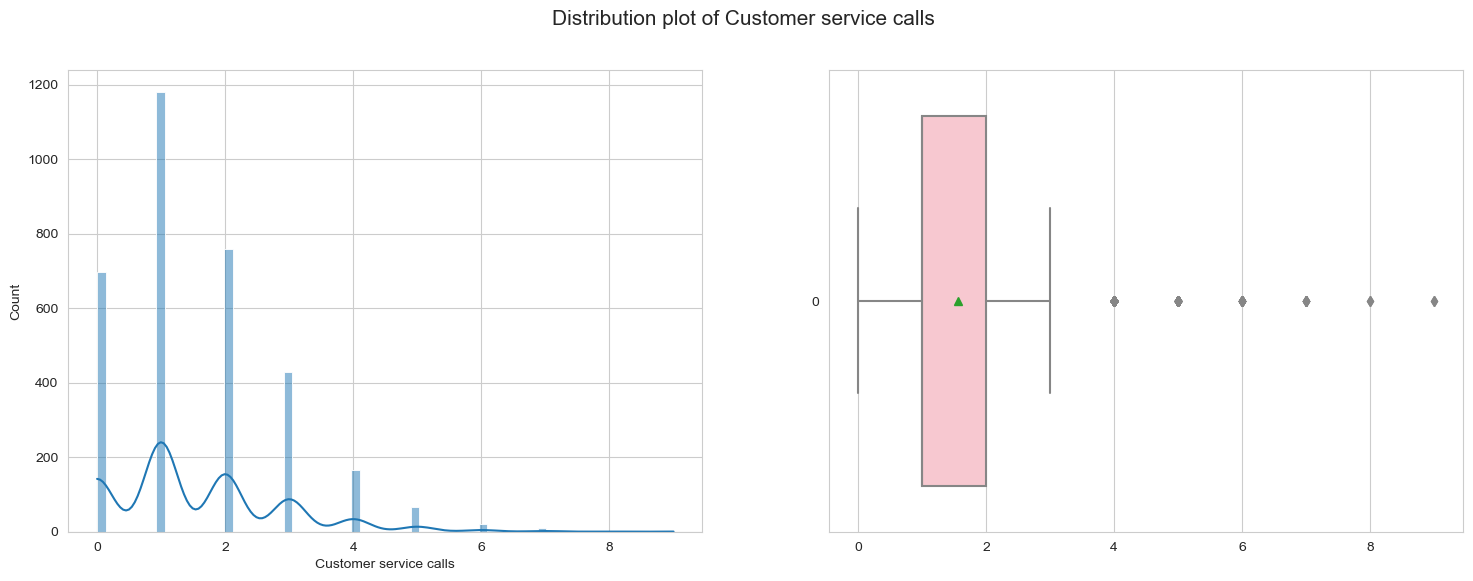

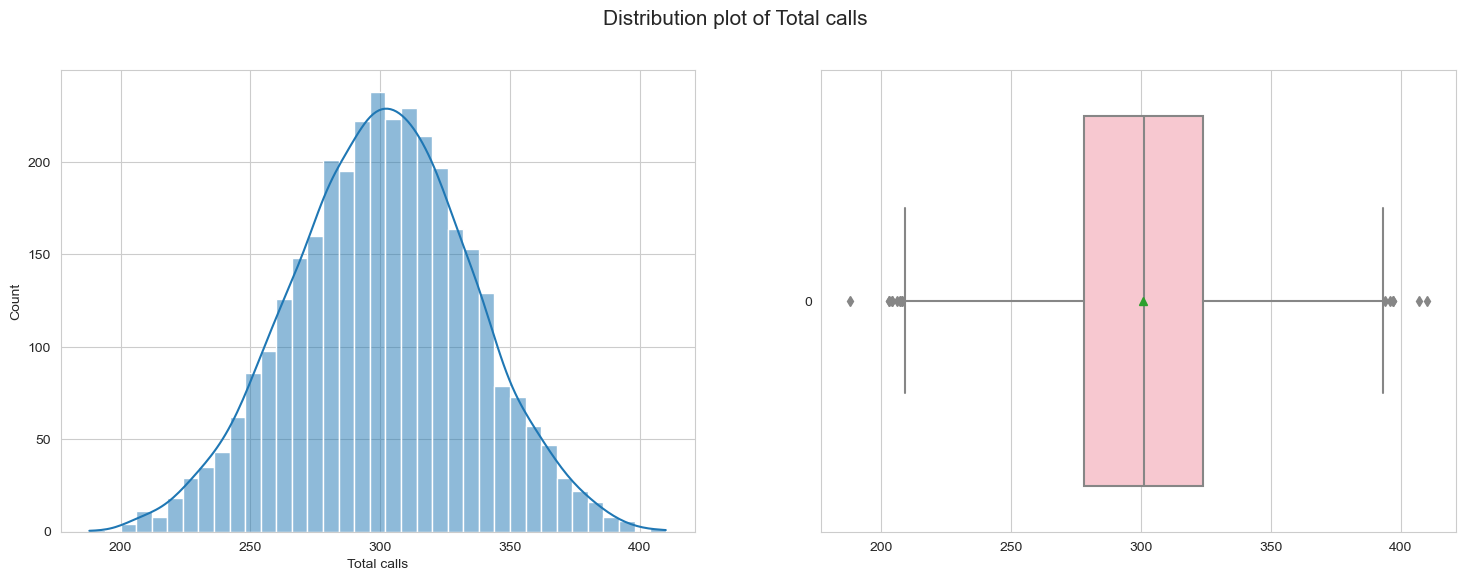

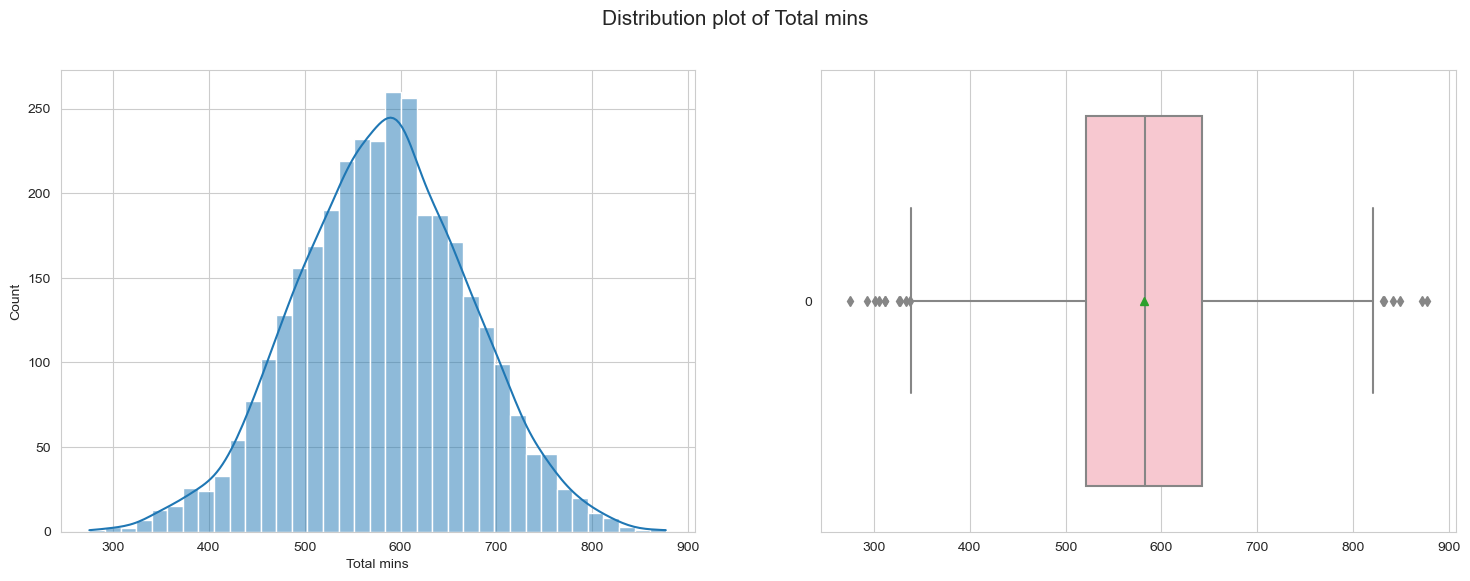

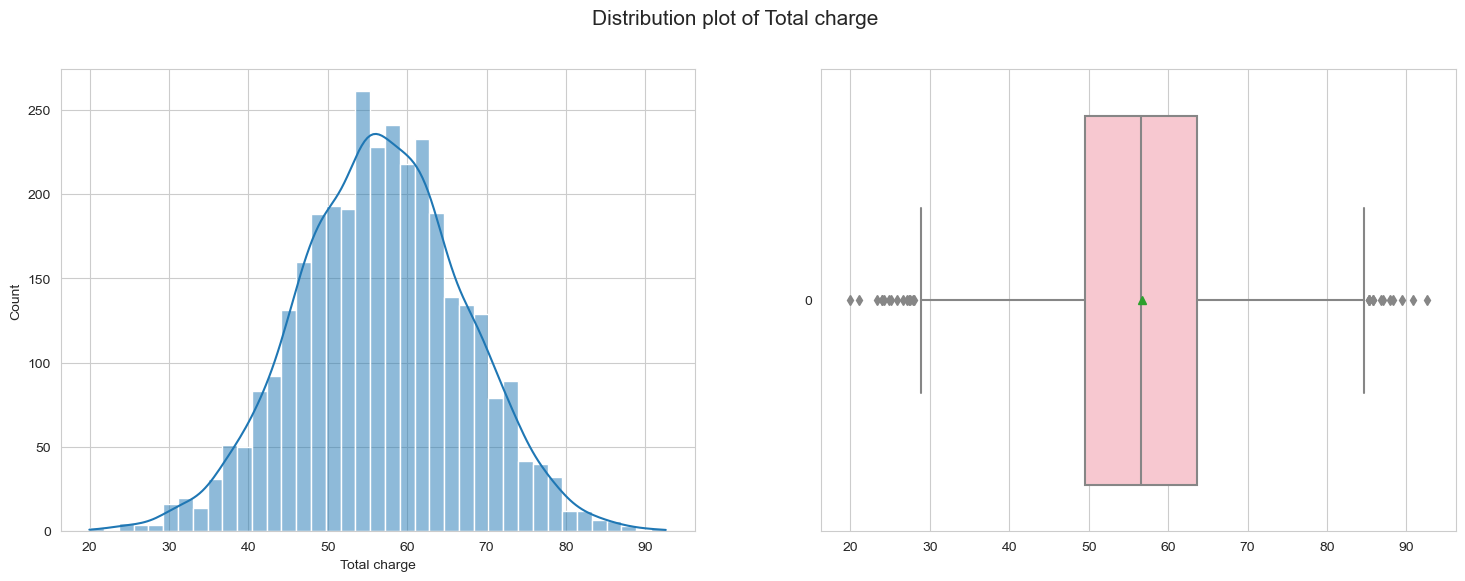

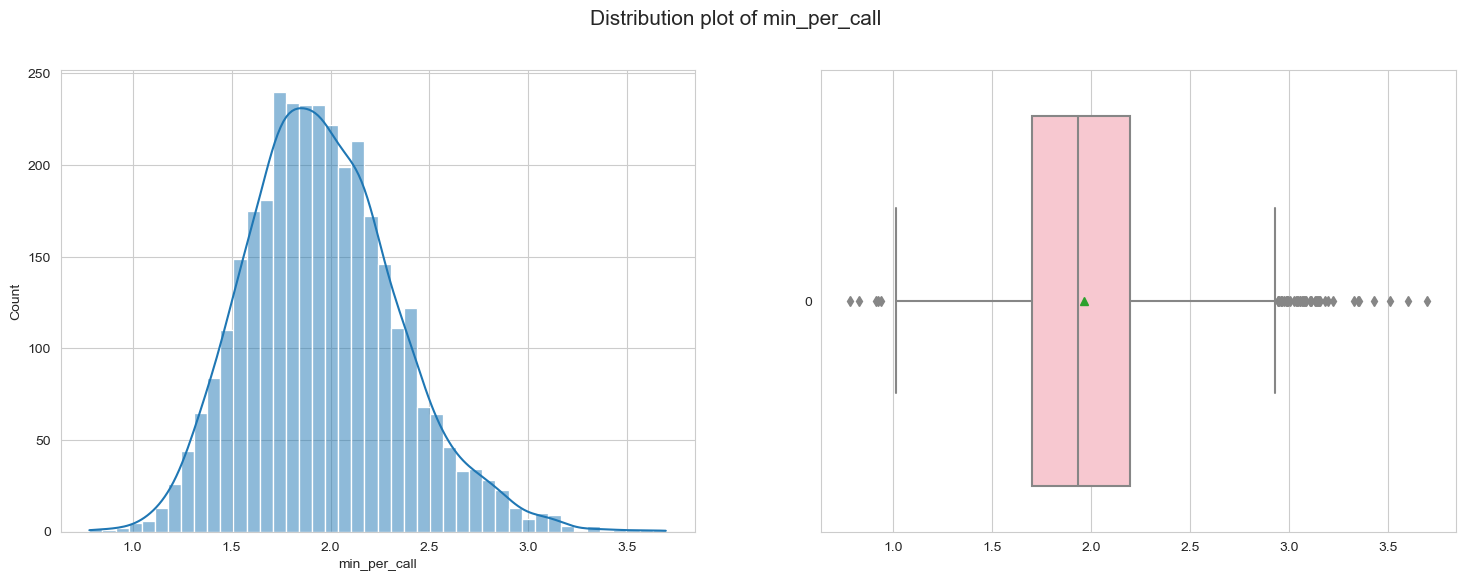

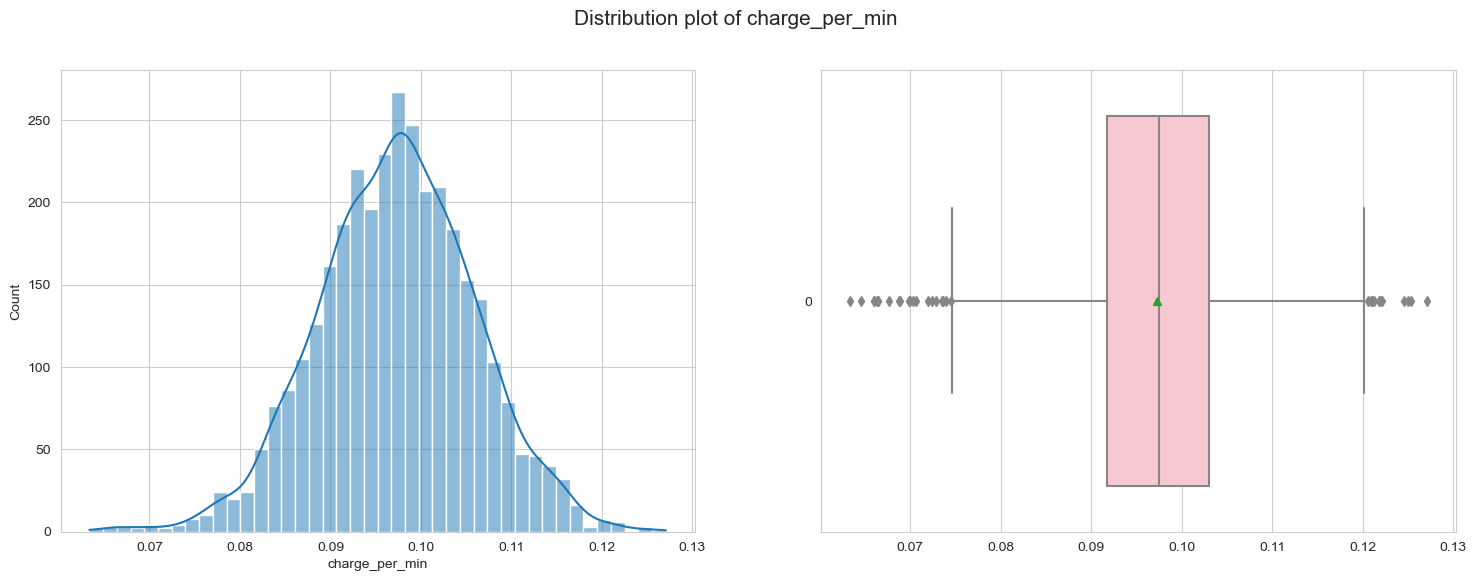

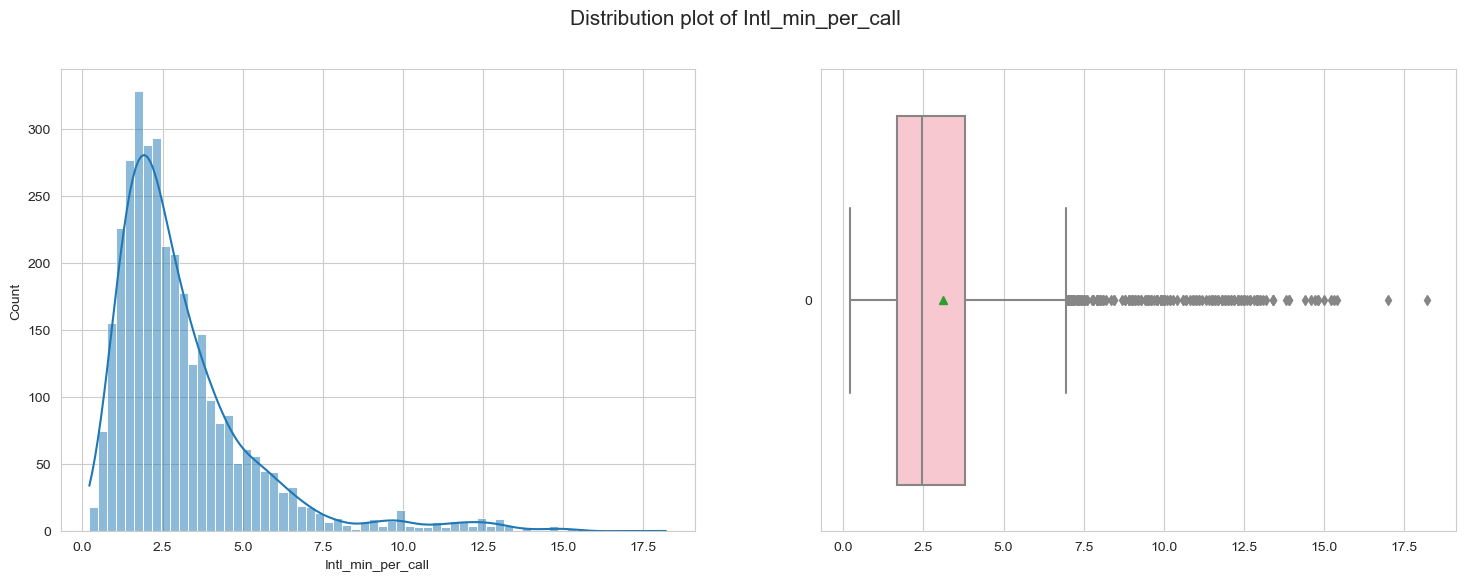

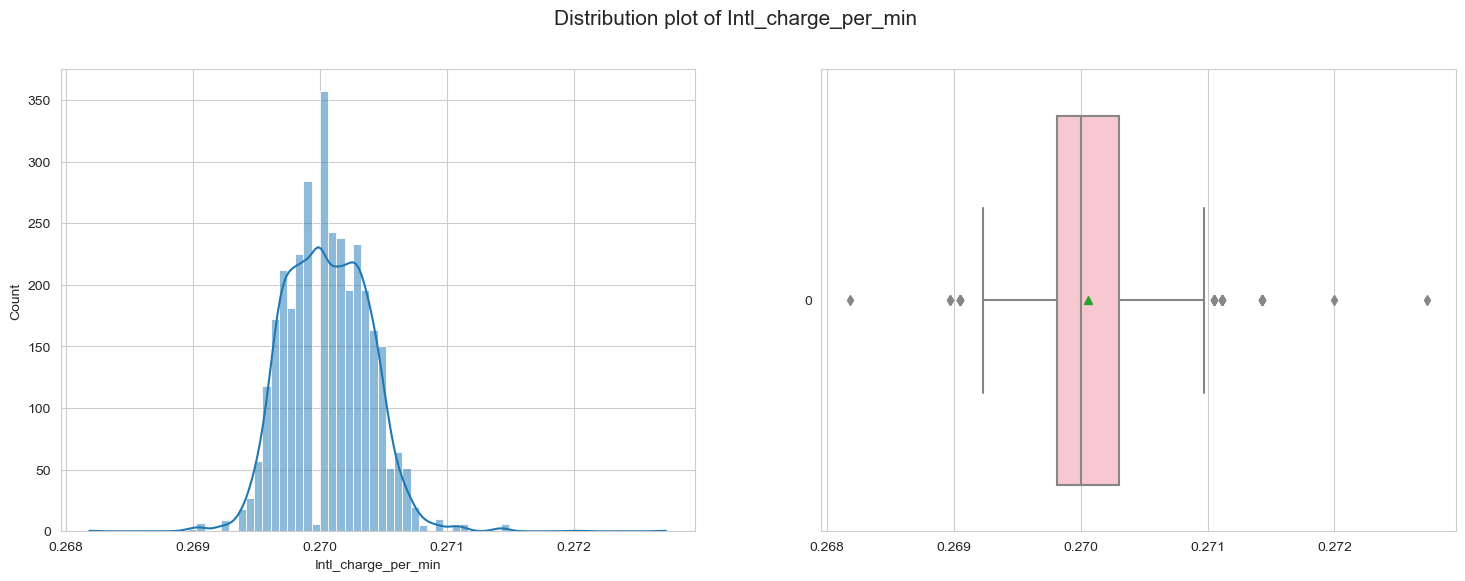

In [269]:
# Chart - 2 Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

#### *1. Why did you pick the specific chart?*

- When the goal is to show the distribution of a single variable we use Histograms. Histograms are a type of bar chart that display the frequency or count of data points within certain ranges.
Histograms are particularly useful for displaying continuous data, such as age, height, weight, or income. They allow you to see the shape of the distribution, including any skewness or outliers, and can help you identify patterns or trends in the data.

- Box plots are also useful for comparing the distributions of two or more datasets, as they allow you to see differences or similarities in the spread and central tendency of the data.Box plots, also known as box-and-whisker plots, are a type of data visualization used to display the distribution of a dataset and provide a summary of its key statistical properties.


#### *2. What is/are the insight(s) found from the chart?*

- From above distribution charts we can see that, all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here Area code will be treated as categorical value as there are only 3 values in the particular column.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

- Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

### Chart - 3 : State vs Average True churn percentage
#### How does churn vary across different states? Analyzing churn rates by state can help identify geographic trends or disparities that might influence churn behavior.

In [270]:
state_churn_counts

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


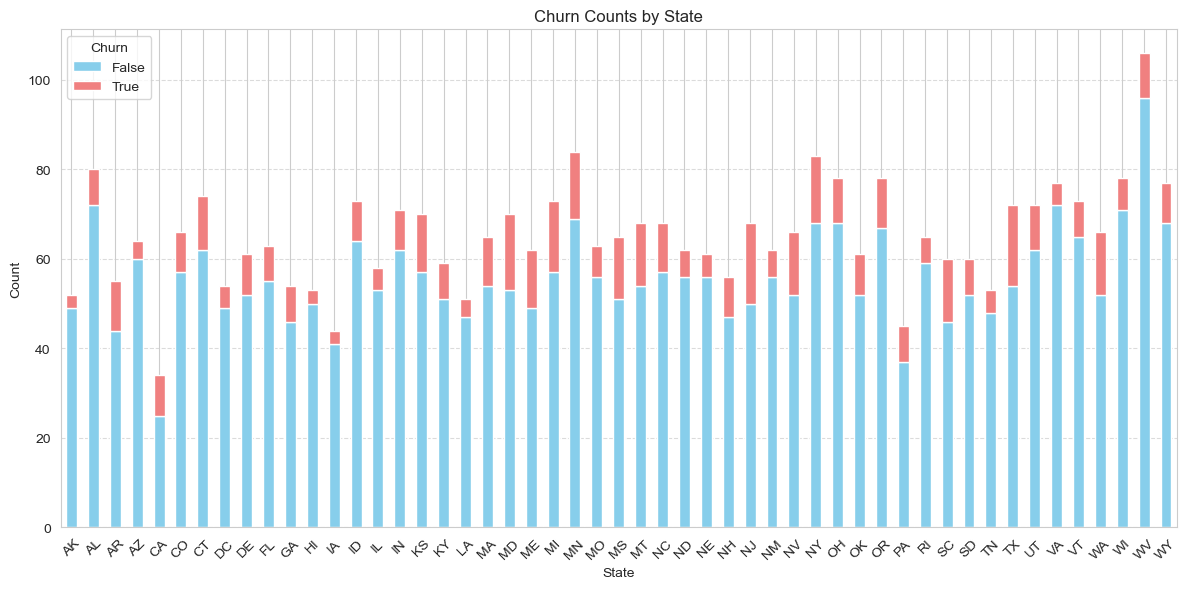

In [271]:
# Plotting
state_churn_counts.plot(kind='bar', stacked=True, figsize=(12, 6),color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title('Churn Counts by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Add Legends and ...
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a graph grid on the y-axis, line style '--' and alpha weight of 0.7.
plt.tight_layout()  # Auto adjusts dimensions

# Show plot
plt.show()

In [272]:
state_churn_topmax = state_churn_perc.head(10)
state_churn_topmax

,State,Average True Churn
0,NJ,26.471
1,CA,26.471
2,TX,25.000
3,MD,24.286
4,SC,23.333
5,MI,21.918
6,MS,21.538
7,NV,21.212
8,WA,21.212
9,ME,20.968


In [273]:
state_churn_topmin = state_churn_perc.tail(10)
state_churn_topmin

,State,Average True Churn
41,RI,9.231
42,WI,8.974
43,IL,8.621
44,NE,8.197
45,LA,7.843
46,IA,6.818
47,VA,6.494
48,AZ,6.250
49,AK,5.769
50,HI,5.660


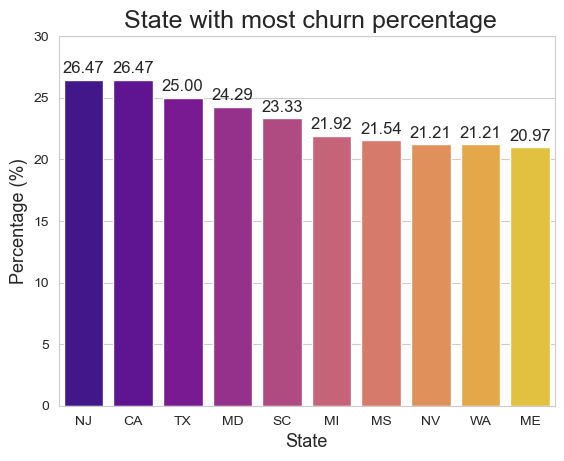

In [274]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plots = sns.barplot(data = state_churn_topmax , x = 'State', y="Average True Churn ",palette='plasma')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 18)
plt.xlabel('State', fontsize = 13)
plt.ylabel('Percentage (%)', fontsize = 13)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

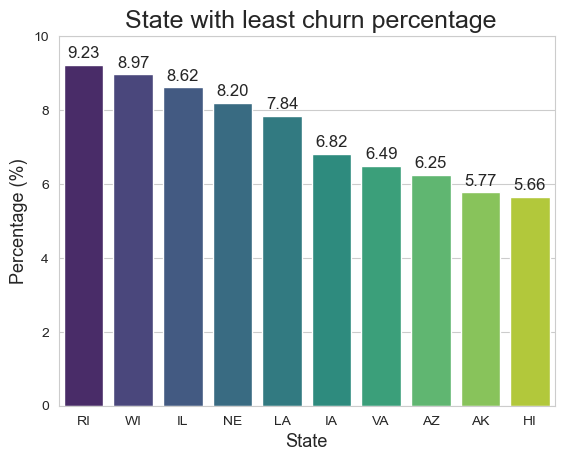

In [275]:
# Vizualizing bottom 10 churned state
plots = sns.barplot(data = state_churn_topmin, x = 'State', y="Average True Churn ",palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 18)
plt.xlabel('State', fontsize = 13)
plt.ylabel('Percentage (%)', fontsize = 13)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

#### *1. Why did you pick the specific chart?*

- Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

- To show the average percentage of true churn with respect to states, we have used Bar Chart.

#### *2. What is/are the insight(s) found from the chart?*

- There are 51 states having different churn rates .

- **MI, MS, NV, WA, ME, CA, NJ ,TX , MD ,SC**  are the ones who have higher churn rate more than 20% which is more than 50% of average churn rate.

- **LA, NE, IL, WI, RI, HI, AK, AZ, VA, IA** are the ones who have lower churn rate which is less than 10%.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, the data of state wise churning depicts that there are lot of states who are having average churn rate more than 20 % which needs to be studied and look for further analysis to decide which factor are causing the churn.

### Chart - 4 : Account Length with Churn

In [276]:
# One Digit Account Length
one_acc_len = df[df['Account length']<=9].loc[:,['Churn']].value_counts()
print(one_acc_len)
print(" ")

# Two Digit Account Length
two_acc_len=df[(df['Account length']<=99) & (df['Account length']>=10)].loc[:,['Churn']].value_counts()
print(two_acc_len)
print(" ")

# Three Digit Account Length
three_acc_len=df[(df['Account length']<=df['Account length'].max()) & (df['Account length']>=100)].loc[:,['Churn']].value_counts()
print(three_acc_len)
print(" ")


Churn
False    22
True      2
Name: count, dtype: int64
 
Churn
False    1378
True      225
Name: count, dtype: int64
 
Churn
False    1450
True      256
Name: count, dtype: int64
 


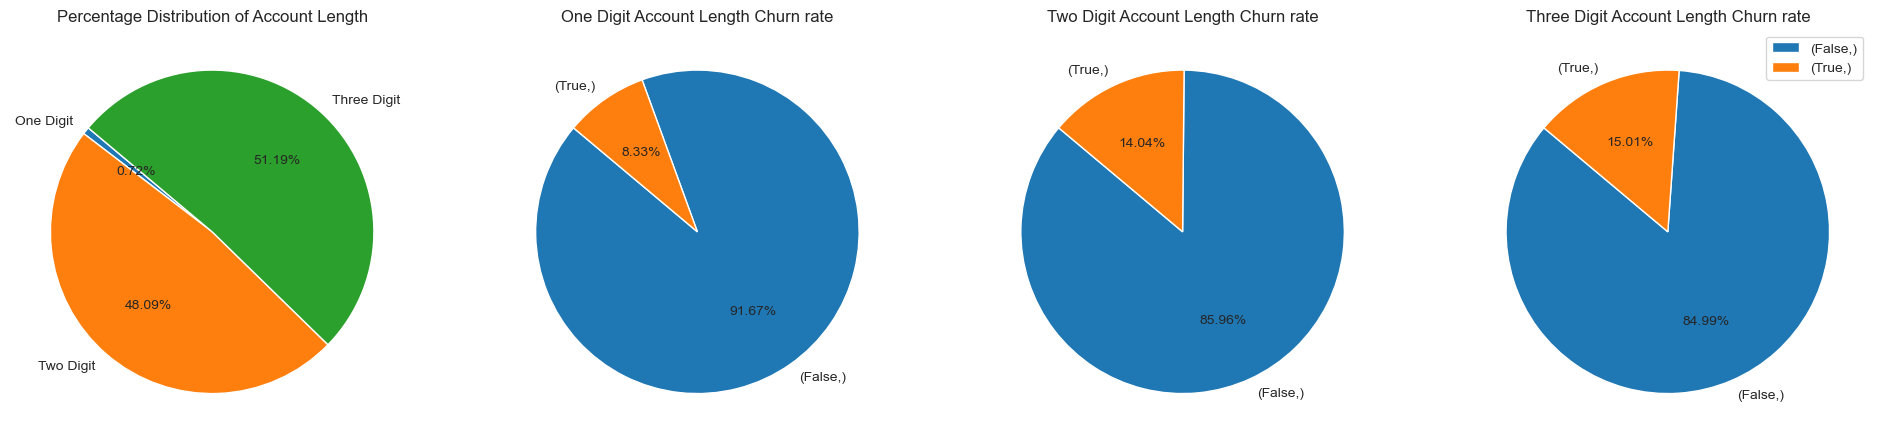

In [277]:
# Calculate the total number of each group
one_acc_len_total = one_acc_len.sum()
two_acc_len_total = two_acc_len.sum()
three_acc_len_total = three_acc_len.sum()

# Create a list containing the total number
acc_len_totals = [one_acc_len_total, two_acc_len_total, three_acc_len_total]
labels = ['One Digit', 'Two Digit', 'Three Digit']

# Create pie chart
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Calculate the percentages of the groups
ax[0].pie(acc_len_totals, labels=labels, autopct='%1.2f%%', startangle=140)
ax[0].set_title('Percentage Distribution of Account Length')

# One digit account length pie chart
ax[1].pie(one_acc_len, labels=one_acc_len.index, autopct='%1.2f%%', startangle=140)
ax[1].set_title('One Digit Account Length Churn rate')

# Two digit account length pie chart
ax[2].pie(two_acc_len, labels=two_acc_len.index, autopct='%1.2f%%', startangle=140)
ax[2].set_title('Two Digit Account Length Churn rate')

# Three digit account length pie chart
ax[3].pie(three_acc_len, labels=three_acc_len.index, autopct='%1.2f%%', startangle=140)
ax[3].set_title('Three Digit Account Length Churn rate')

plt.legend(loc='upper right')

plt.show()


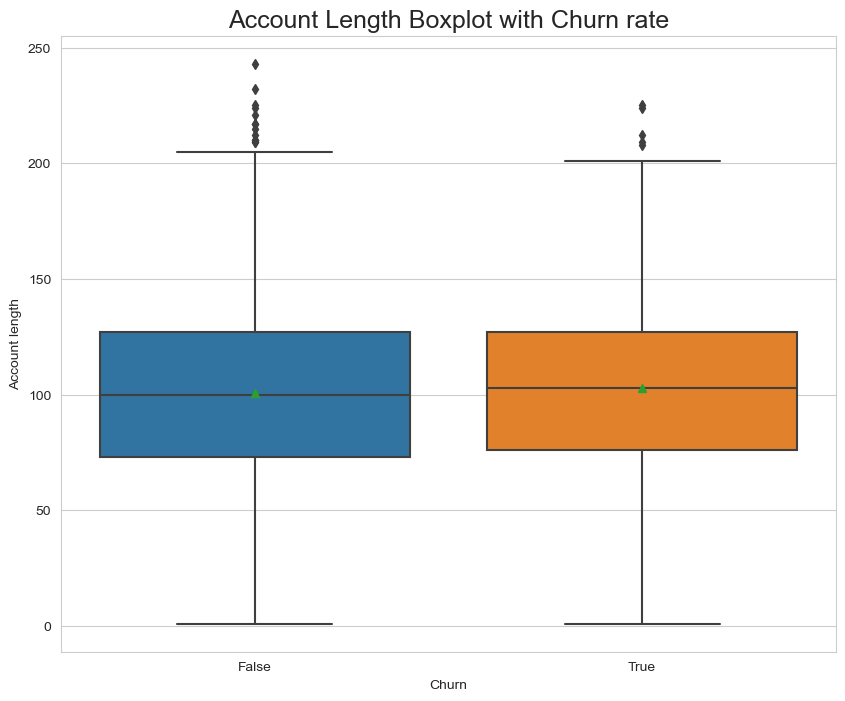

In [278]:
# Box Plot for Account Length attribute
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Churn', y='Account length', showmeans = True)
plt.title('Account Length Boxplot with Churn rate', fontsize=18)
plt.show()

#### *1. Why did you pick the specific chart?*

- Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

- So, I used Pie chart and which helped me to get the percentage comparision of the churn percentage account length wise.

- A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

- So, I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.

#### *2. What is/are the insight(s) found from the chart?*

- Based on chart, it is seen that accounts with one digit account length for 0.72% (equivalent to 24 accounts), accounts with two digit account length for 48.09% (equivalent to 1603 accounts ), accounts with three digit account length for 51.19% (equivalent to 1706 accounts )

- One digit account length has 24 accounts, accounting for 5% of the total number of accounts in the dataframe, of which the number of accounts that have not churn is 22, accounting for 91.7%,the remaining accounts are churning accounts, accounting for 8 .3%

- Two digit account length has 1603 accounts, accounting for 48.09% and Three digit account length has 1706 accounts, accounting for 51.19% of the total number of customers in the dataframe, of which the number of customers that have not churn with two digit account length is 1378 accounts, with three degit account length is 1450 account

- As from the above record, we can see that Two digit Account Length customers are churning with a number of 225 and Three digit Account Length customers are churning with a number of 256.

So, their churning rate is high.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

- Account length is the no. of days the customers are active. So for the new customers those churning rate is too low around 8.3% in percentage and number is 2. They might be just using the telecom service to experience the benefits and they might not be satisfied with the service provided and churned.

- Those people whose account length are between 10 to 99 are having a churning rate of 14%. The customers below 50 might be treated as new customers and more than 55 and less than 99 they might not be geting benefits from plan taken.

- Those people whose account length is more than 100 are like old customers and they might be churning due to no additional offers given to them like power plus plan or other benefits.

- So, yes Account Length is also depicting a clear view of churing reasons and insights.

### Chart -5 : International Plan


In [279]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,2.35,1,False,267,751.9,70.97,2.816105,0.094388,2.175000,0.270115
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,3.43,4,True,331,566.4,50.77,1.711178,0.089636,2.116667,0.270079
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,1.46,4,True,292,811.3,90.83,2.778425,0.111956,0.600000,0.270370
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,2.08,2,False,310,437.3,38.97,1.410645,0.089115,1.283333,0.270130
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,3.00,1,False,316,513.1,46.60,1.623734,0.090821,11.100000,0.270270


International plan
No     3010
Yes     323
Name: count, dtype: int64


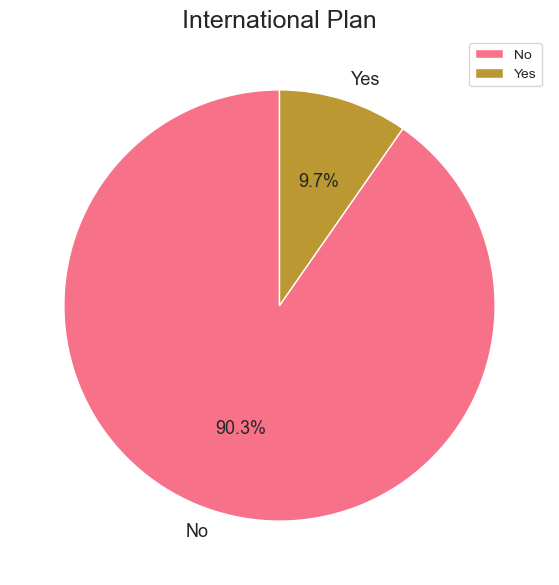

In [280]:
# data for international plan
inter_plan = df['International plan'].value_counts()
print(inter_plan)

# Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(inter_plan, labels=['No','Yes'],startangle=90 , colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.legend(loc='upper right')
plt.show()

In [281]:
#  Calculate the quantity of "International plan" with 2 values: Yes and No in the "Churn" column
churn_counts_intp = df.groupby(['International plan','Churn'])['Churn'].value_counts().unstack(fill_value=0)
churn_counts_intp

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


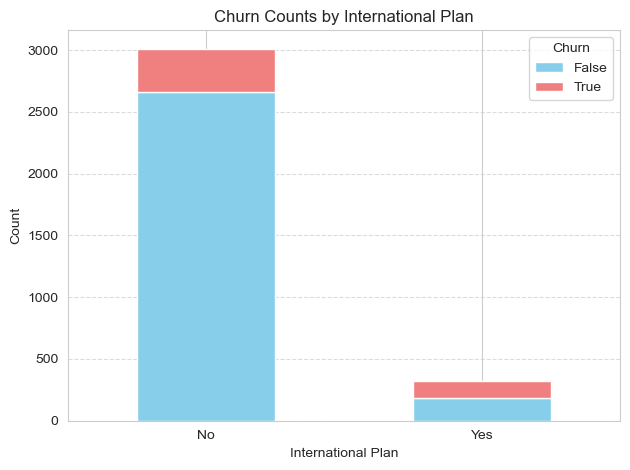

In [282]:
# Draw Bar Chart
churn_counts_intp.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add title, label and legend
plt.title('Churn Counts by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['False', 'True'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot
plt.show()

In [283]:
# Assigning values for furthur charts
i1 = df['International plan'].unique()
i2 = df.groupby('International plan')['Churn'].mean()*100
i3 = df.groupby(['International plan'])['Total intl charge'].mean()
i4 = df.groupby(["Churn"])['Total intl minutes'].mean()
print(i1,i2,i3,i4)

['No' 'Yes'] International plan
No     11.495017
Yes    42.414861
Name: Churn, dtype: float64 International plan
No     2.753279
Yes    2.869907
Name: Total intl charge, dtype: float64 Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


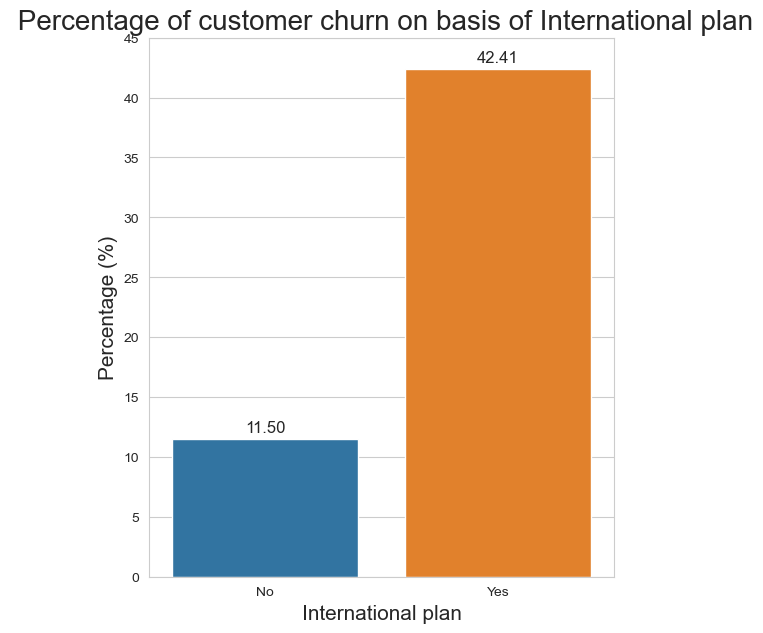

In [284]:
# Visualizing code for people churning percentage having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=df['International plan'].unique(),
                    y=df.groupby('International plan')['Churn'].mean()*100)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.ylim(0,45)
plt.show()

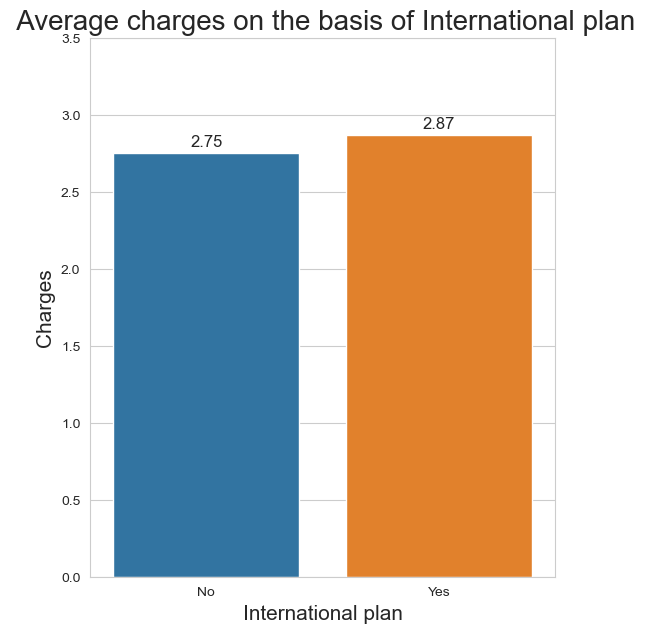

In [285]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=df['International plan'].unique(),
                    y=df.groupby(['International plan'])['Total intl charge'].mean())
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

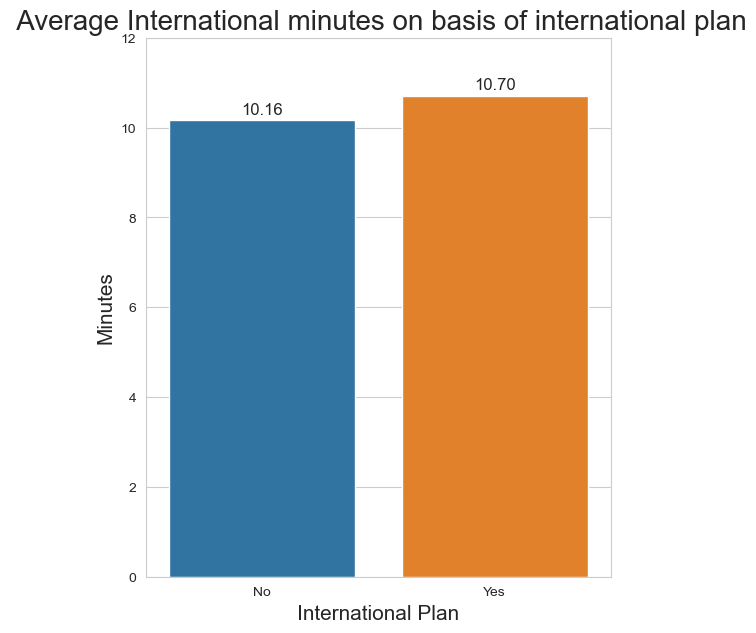

In [286]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=df['International plan'].unique(),
                    y=df.groupby(["Churn"])['Total intl minutes'].mean())
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 20)
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Minutes', fontsize = 15)
plt.ylim(0,12)
plt.show()

#### *1. Why did you pick the specific chart?*

- Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole. So, we used to show the percentage of people taken international plan through pie chart with different colored area under a circle.

- Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

- So, we used bar chart to show the percentage of customers churned having international plan and the average calling charge as well as conversation average minutes of customers those have international plan.

#### *2. What is/are the insight(s) found from the chart?*

**INTERNATIONAL PLAN**

In this analysis, 3,010 customers did not have an international plan, leaving 323 customers with an international plan.

Among those who have an international plan, 42.4 % people churn.

Whereas among those who dont have an international plan, only 11.4 % people churn.

Among those who  have a international plan their average charge is 2.87 and they talk for 10.7 minutes on an average.

Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.16 minutes on an average.

The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who dont have a international plan. Hence they arent getting any benefits for having an international plan so they might be unhappy.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights found will definitely help for a positive business impact. Those people who  have international plan they are paying some additional charges to get the plan but the talk time value charge is same as those customers having no international plan. That might be great reason for more churns for those having international plan.

### Chart - 6 : Voice Mail

In [287]:
# df['Voice mail plan'].unique()

In [288]:
# Calculate churn rates for customers with and without voice mail plans
churn_vmp = df.groupby('Voice mail plan')['Churn'].count()
churn_vmp

Voice mail plan
No     2411
Yes     922
Name: Churn, dtype: int64

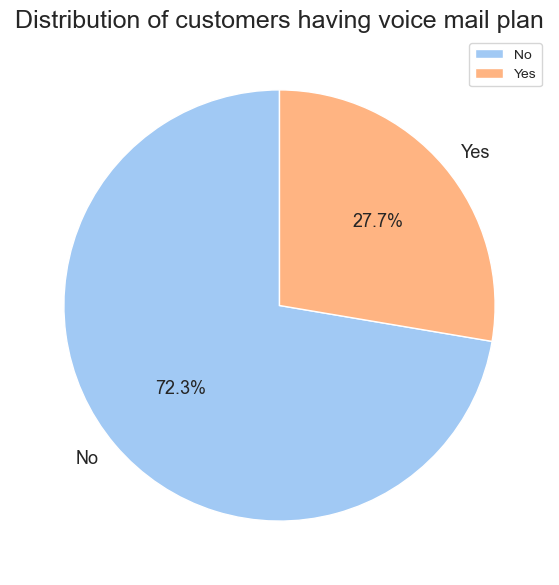

In [289]:
# vizualizing code for customers percentage having voice mail plan

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,7))
plt.pie(churn_vmp, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.legend(loc='upper right')
plt.show()

In [290]:
#  Calculate the quantity of "Voice mail plans" with 2 values: Yes and No in the "Churn" column
churn_counts_vmp = df.groupby(['Voice mail plan'])['Churn'].value_counts().unstack(fill_value=0)
churn_counts_vmp

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


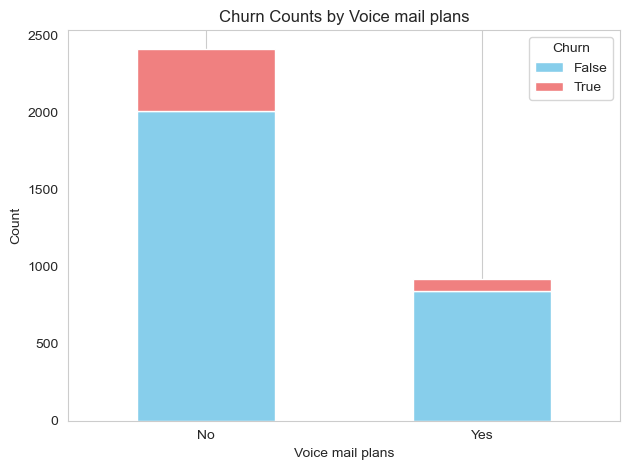

In [291]:
# Draw Bar Chart
churn_counts_vmp.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add title, label and legend
plt.title('Churn Counts by Voice mail plans')
plt.xlabel('Voice mail plans')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['False', 'True'])
plt.grid(axis='y')
plt.tight_layout()

# Display Bar chart
plt.show()

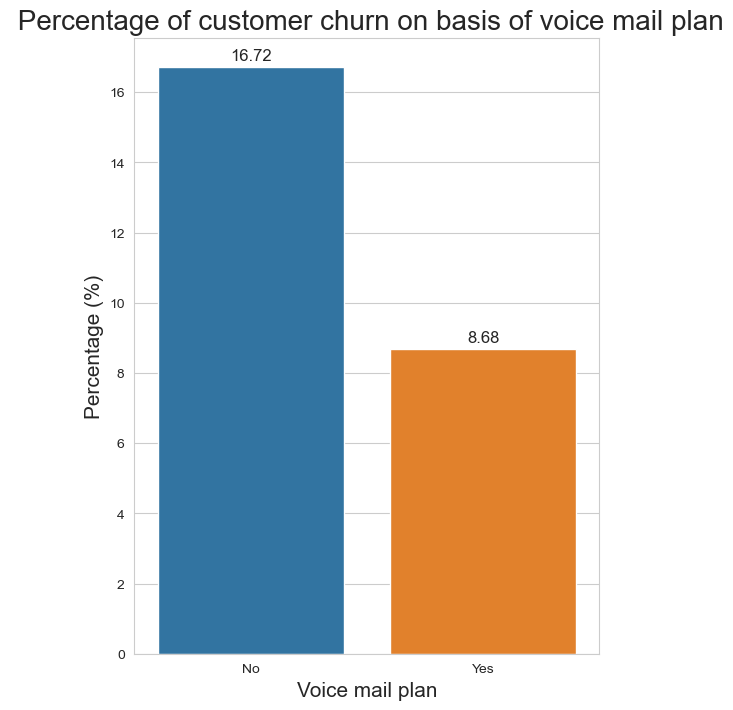

In [292]:
# Vizualizing code for customers churning while having voice mail plan

plt.figure(figsize=(6,8))
plots = sns.barplot(x=df['Voice mail plan'].unique(),
                    y=df.groupby('Voice mail plan')['Churn'].mean().mul(100),)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# plt.legend(loc='upper right')
plt.show()

#### *1. Why did you pick the specific chart?*

- Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

- So, we have used pie chart to show the percentage of customers having voice mail plan.

- Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

- So, we have used bar chart to show the percentage of customers churned having voice mail plan.



#### *2. What is/are the insight(s) found from the chart?*

**VOICE MAIL**

- 2411 dont have a voice mail plan

- 922 have a voice mail plan

- Among those who dont have a voice mail 16.7 % people churn.

- Whereas among those who have a voice mail plan only 8.7 % people churn.


***Customers  with the Voice Mail Plan tend to churn less frequently***

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, voice mail plan might be considered partially.

### Chart - 7 : Area Code

In [293]:
print(Area_code_churn_perc)

   Area code   Perc
0        408  14.56
1        415  14.26
2        510  14.88


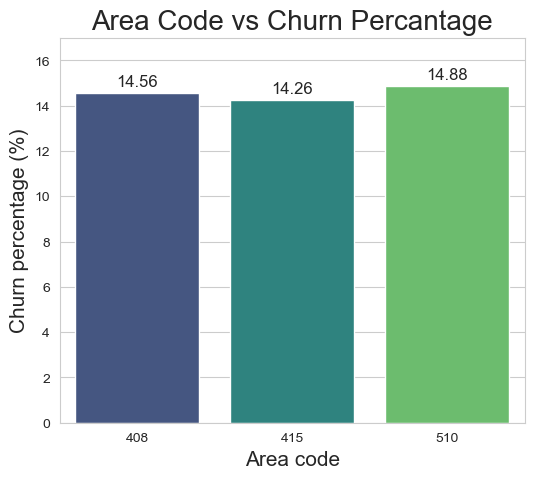

In [294]:
# Chart - 7 visualization code
# Visualizing code for Area Code wise average churn percentage

plt.figure(figsize=(6, 5))
plots = sns.barplot(data=Area_code_churn_perc, x='Area code', y='Perc', palette='viridis')

# plt.figure(figsize=(6,5))
# plots = sns.barplot(x=df['Area code'].unique(),
#                     y=Area_code_churn_perc)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage',fontsize=20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage (%)', fontsize = 15)
plt.ylim(0,17)
plt.show()

In [295]:
print(Area_code_churn)

   Area code  Churn  count
0        408  False    716
1        408   True    122
2        415  False   1419
3        415   True    236
4        510  False    715
5        510   True    125


In [296]:
print(type(Area_code_churn))

<class 'pandas.core.frame.DataFrame'>


<Figure size 1000x600 with 0 Axes>

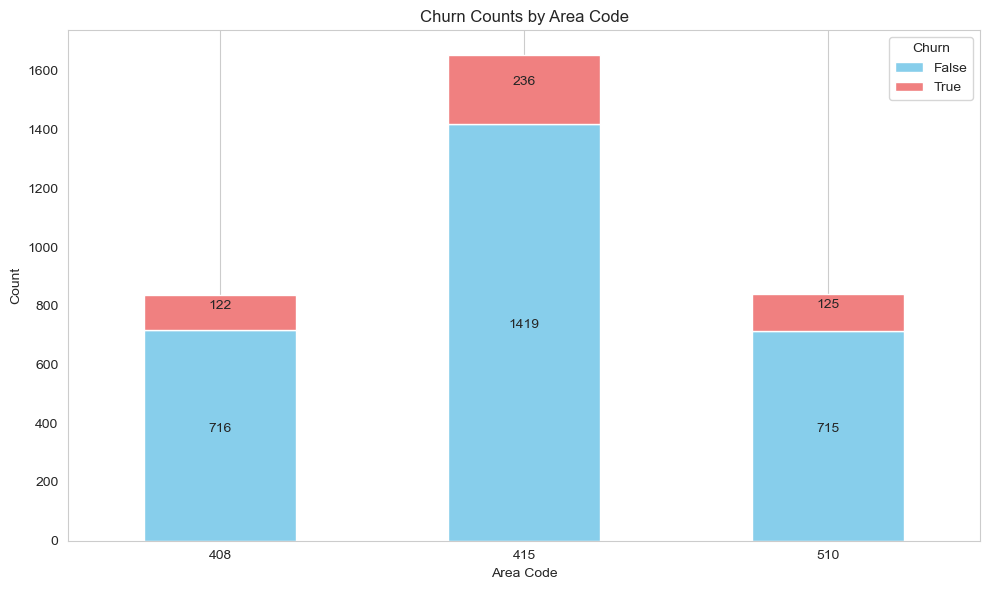

In [297]:
# Pivot the data to get it in the correct format for plotting
pivot_df = Area_code_churn.pivot(index='Area code', columns='Churn', values='count').fillna(0)

# Plotting using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
ax = pivot_df.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 6))

# Add title, labels, and legend
plt.title('Churn Counts by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['False', 'True'])
plt.grid(False, axis='y')  # Turn off the horizontal gridlines
plt.tight_layout()

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating bars with zero height
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')

# Display the chart
plt.show()

#### *1. Why did you pick the specific chart?*

- Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

- To show the average percentage of true churn with respect to Area Code, we have used Bar Chart.

#### *2. What is/are the insight(s) found from the chart?*

All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

- No, Area Code doesn't have any contribution to churn rate for 14% churn rate is same for all the area codes. But while furthur sagreggating the area codes with respective states in those area code, it can be analysed the states in which the issue is happeing. So, it has been defined above.

- So, here Area code won't help to create business impact but the respective states wise analysis can help.

### Chart - 8 : Overall Calls

In [298]:
print(aver_day_mins)
print('')
print(aver_day_calls)
print('')
print(aver_day_charge)


   Churn  day_mins
0  False   175.176
1   True   206.914

   Churn   day_calls
0  False  100.283158
1   True  101.335404

   Churn  day_charge
0  False   29.780421
1   True   35.175921


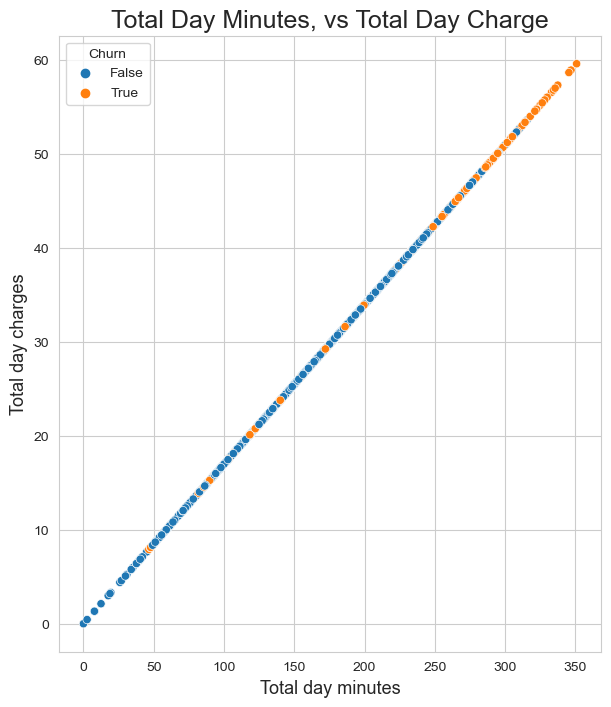

In [299]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,8))
sns.scatterplot(data=df, x="Total day minutes", y="Total day charge", hue="Churn")
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [300]:
print(aver_eve_mins)
print('')
print(aver_eve_calls)
print('')
print(aver_eve_charge)


   Churn    eve_mins
0  False  199.043298
1   True  212.410145

   Churn   eve_calls
0  False  100.038596
1   True  100.561077

   Churn  eve_charge
0  False   16.918909
1   True   18.054969


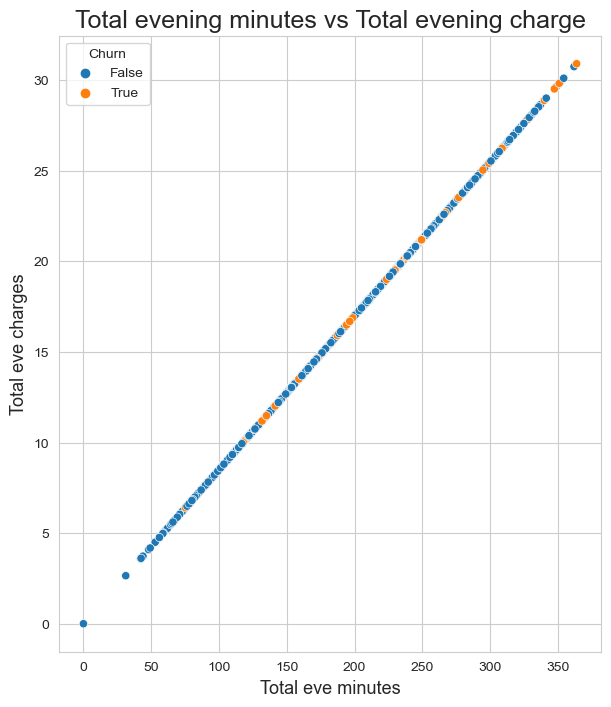

In [301]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [302]:
print(aver_night_mins)
print('')
print(aver_night_calls)
print('')
print(aver_night_charge)


   Churn  night_mins
0  False  200.133193
1   True  205.231677

   Churn  night_calls
0  False   100.058246
1   True   100.399586

   Churn  night_charge
0  False      9.006074
1   True      9.235528


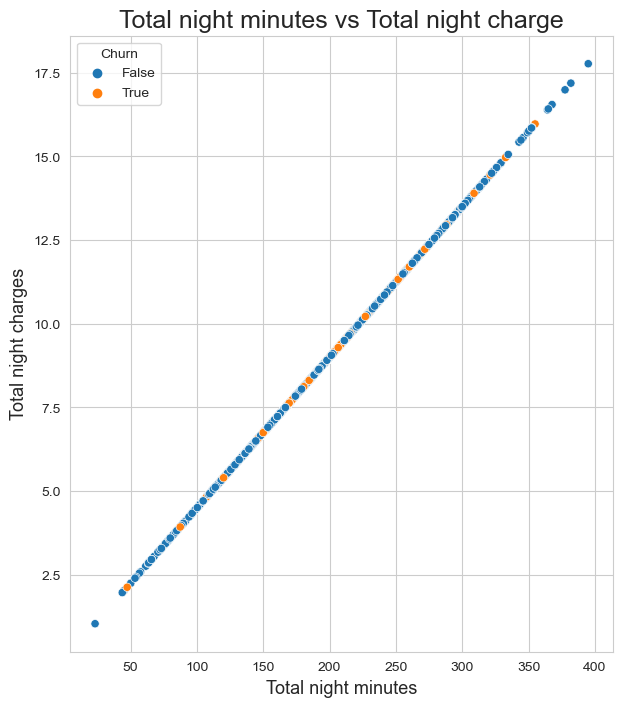

In [303]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df)
plt.title('Total night minutes vs Total night charge', fontsize=18)
plt.xlabel('Total night minutes',fontsize = 13)
plt.ylabel('Total night charges',fontsize = 13)
plt.show()

In [304]:
# Merge aver_day_calls, aver_eve_calls and aver_night_calls based on churn column
aver_calls = pd.merge(pd.merge(aver_day_calls, aver_eve_calls, on='Churn'), aver_night_calls, on='Churn')
aver_calls

,Churn,day_calls,eve_calls,night_calls
0,False,100.283158,100.038596,100.058246
1,True,101.335404,100.561077,100.399586


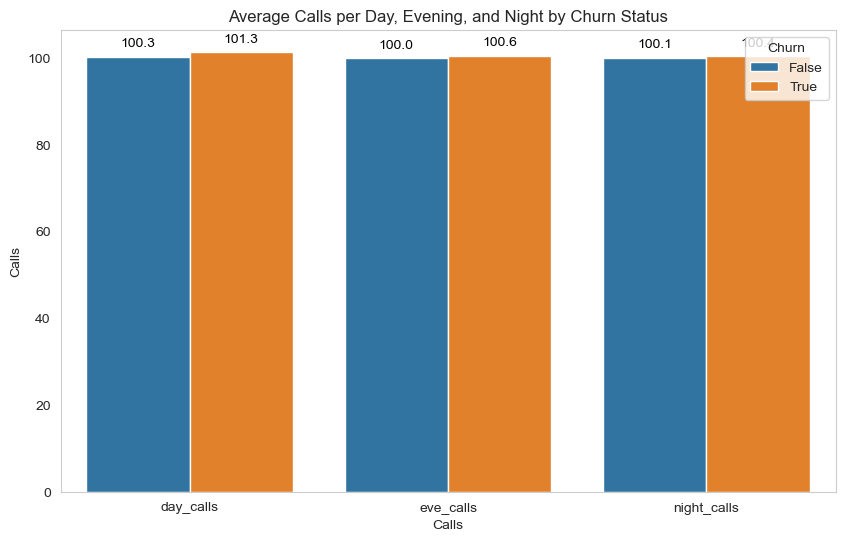

In [305]:
# Setting size and style for bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Preparing data for bar plot
bar_plot = aver_calls.melt(id_vars='Churn', var_name='Calls', value_name='Average Calls')

# Creating bar plot
ax = sns.barplot(data=bar_plot, x='Calls', y='Average Calls', hue='Churn')

# Add title, legends, and labels
plt.title('Average Calls per Day, Evening, and Night by Churn Status')
plt.xlabel('Calls')
plt.ylabel('Calls')
plt.grid(False, axis='y')  # Turn off the horizontal gridlines
plt.legend(title='Churn')

# Add values on top and in the middle of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9),  # Adjust this to place text on top
                textcoords='offset points',
                fontsize=10, color='black')

# Display chart
plt.show()

In [306]:
# Merge aver_day_mins, aver_eve_mins and aver_night_mins based on churn column
aver_mins = pd.merge(pd.merge(aver_day_mins, aver_eve_mins, on='Churn'), aver_night_mins, on='Churn')
aver_mins

,Churn,day_mins,eve_mins,night_mins
0,False,175.176,199.043298,200.133193
1,True,206.914,212.410145,205.231677


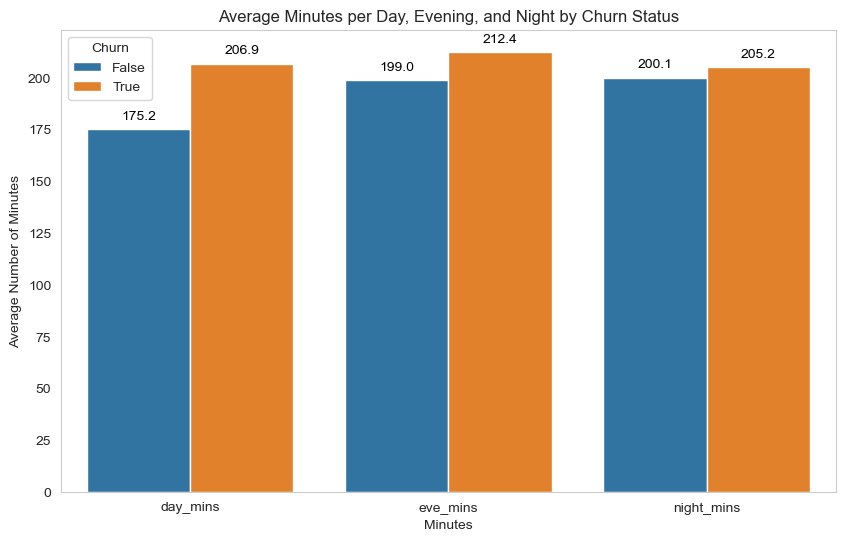

In [307]:
# Setting size and style for bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Preparing data for bar plot
bar_plot = aver_mins.melt(id_vars='Churn', var_name='Minutes', value_name='Average Calls')

# Creating bar plot
ax = sns.barplot(data=bar_plot, x='Minutes', y='Average Calls', hue='Churn')

# Add title, legends, and labels
plt.title('Average Minutes per Day, Evening, and Night by Churn Status')
plt.xlabel('Minutes')
plt.ylabel('Average Number of Minutes')
plt.grid(False, axis='y')  # Turn off the horizontal gridlines
plt.legend(title='Churn')

# Add values on top and in the middle of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9),  # Adjust this to place text on top
                textcoords='offset points',
                fontsize=10, color='black')

# Display chart
plt.show()

In [308]:
# Merge aver_day_charge, aver_eve_charge and aver_night_charge based on churn column
aver_charge = pd.merge(pd.merge(aver_day_charge, aver_eve_charge, on='Churn'), aver_night_charge, on='Churn')
aver_charge

,Churn,day_charge,eve_charge,night_charge
0,False,29.780421,16.918909,9.006074
1,True,35.175921,18.054969,9.235528


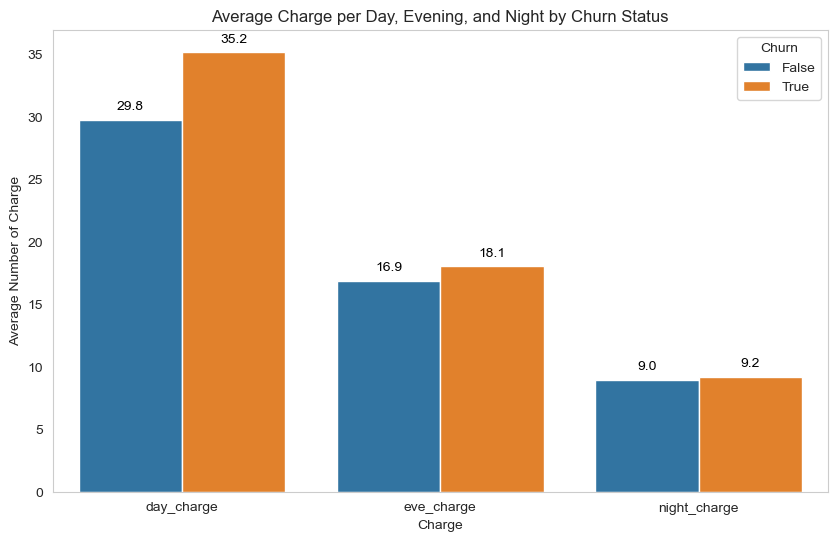

In [309]:
# Setting size and style for bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Preparing data for bar plot
bar_plot = aver_charge.melt(id_vars='Churn', var_name='Charge', value_name='Average Calls')

# Creating bar plot
ax = sns.barplot(data=bar_plot, x='Charge', y='Average Calls', hue='Churn')

# Add title, legends, and labels
plt.title('Average Charge per Day, Evening, and Night by Churn Status')
plt.xlabel('Charge')
plt.ylabel('Average Number of Charge')
plt.grid(False, axis='y')  # Turn off the horizontal gridlines
plt.legend(title='Churn')

# Add values on top and in the middle of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9),  # Adjust this to place text on top
                textcoords='offset points',
                fontsize=10, color='black')
# Display chart
plt.show()

#### *1. Why did you pick the specific chart?*

Scatter plots are used to plot the relationship between two numerical variables. Scatter plots are useful for identifying patterns and trends in data, and they can be used to visualize the relationship between two variables.

So, we have used the scatter plot to depict the relationship between evening, day & night calls , minutes and charge.

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

So, we have used the bar plot to show the evening, night and day manipulated data to depict meaningful insights.

#### *2. What is/are the insight(s) found from the chart?*

**OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

#### *3. Will the gained insights help creating a positive business impact?*
Are there any insights that lead to negative growth? Justify with specific reason.

For telecom service provider calling and messaging are two essential product plans. Thus, optimizing voice call plans will definitely create a business impact. Those who are using just calling service must be provided some additional offers either in talktime or powerplus plan. Those who use voice call plan for night only, we might offer some exciting plans from midnight 12 to morning 6. For customers those who have higher accout length should be provided exciting offers as they are our loyal customers. Churing of higher account length customer will have a negative impact on business.


### Chart - 9 : Customer Service Calls

In [310]:
churn_scalls

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


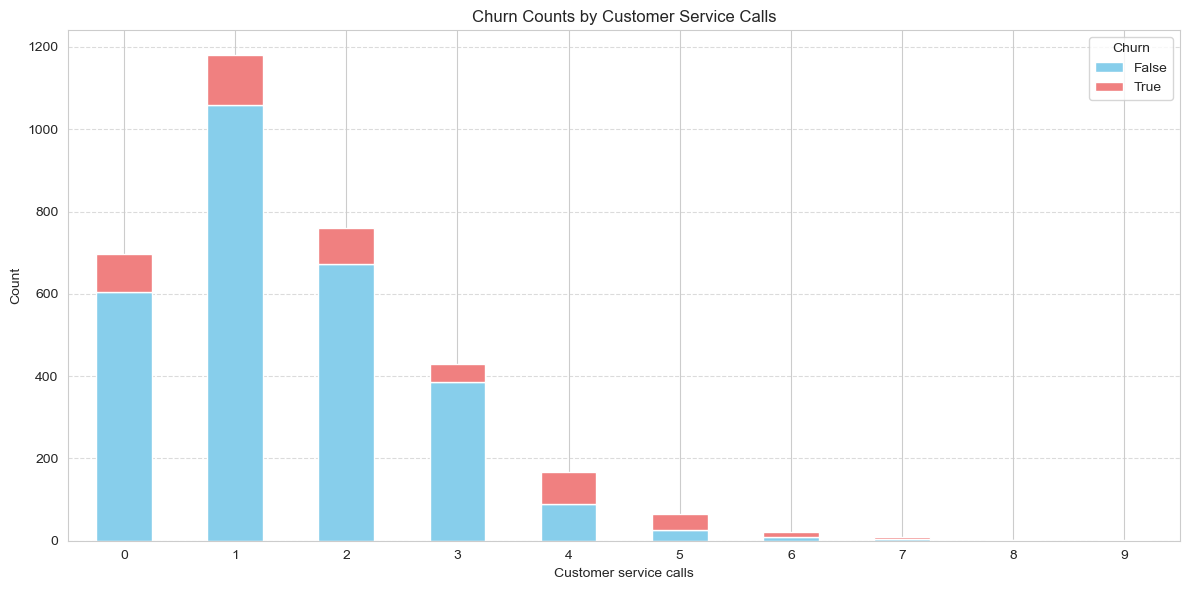

In [311]:
# Plotting
churn_scalls.plot(kind='bar', stacked=True, figsize=(12, 6),color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title('Churn Counts by Customer Service Calls')
plt.xlabel('Customer service calls')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

# Add Legends and ...
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a graph grid on the y-axis, line style '--' and alpha weight of 0.7.
plt.tight_layout()  # Auto adjusts dimensions

# Show plot
plt.show()

In [312]:
per_churn_scalls

,Customer service calls,Perc_churned
0,0,13.199426
1,1,10.330229
2,2,11.462451
3,3,10.256410
4,4,45.783133
5,5,60.606061
6,6,63.636364
7,7,55.555556
8,8,50.000000
9,9,100.000000


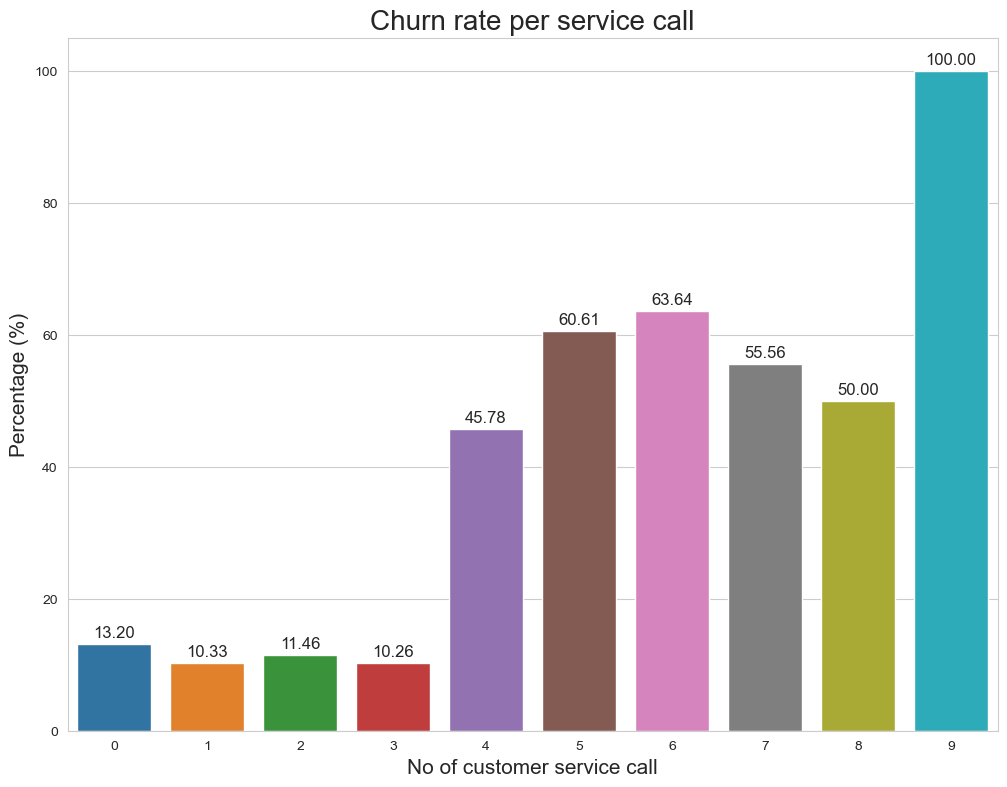

In [313]:
# Visualizing churn rate per customer service calls
plt.figure(figsize=(12,9))
plots = sns.barplot(x=per_churn_scalls.index, y=per_churn_scalls['Perc_churned'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 20)
plt.xlabel('No of customer service call', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

#### *1. Why did you pick the specific chart?*

- Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

- So, we have used the bar plot to show the relationship between churn rate per customer service calls.

#### *2. What is/are the insight(s) found from the chart?*

**CUSTOMER SERVICE CALL**

- The service calls of customers varies from 0 to 9 .

- Those customers who make more service calls they have a high probability of leaving.

- As we can see from graph , customers with more than 5, their churning rate is more.

- Hence customers who make more than 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

### Chart - 10 - Correlation Heatmap

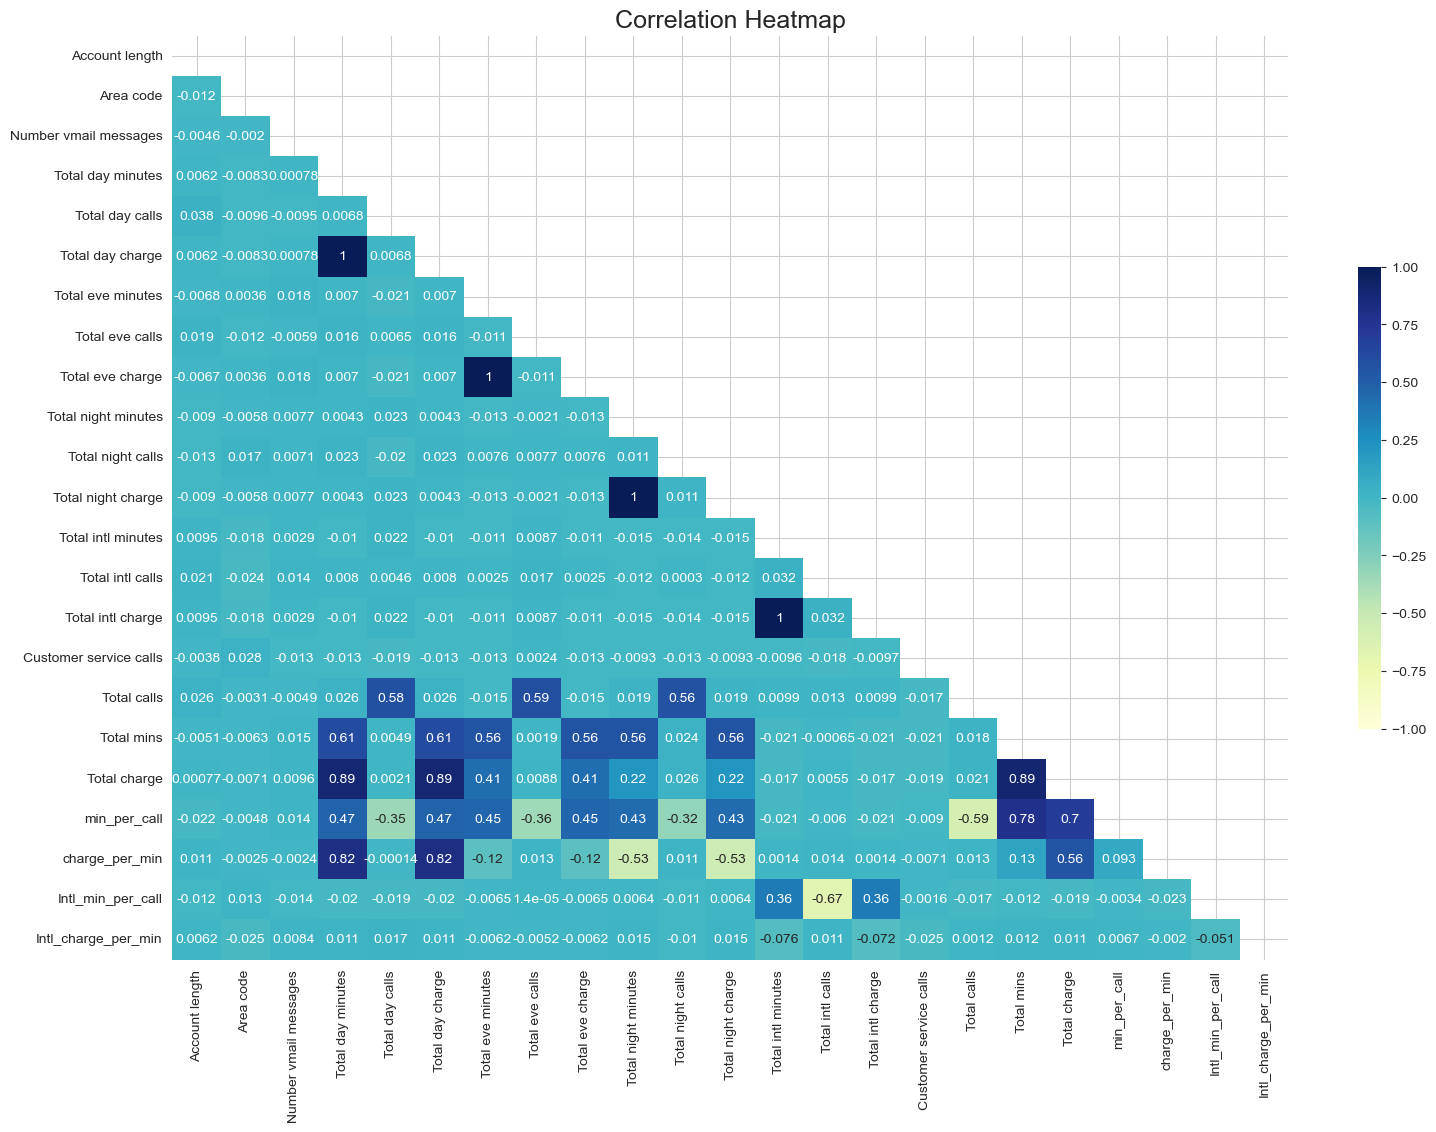

In [314]:

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", cbar_kws={"shrink": .5})

# Customize the appearance of the heatmap
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

#### *1. Why did you pick the specific chart?*

- The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

- Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

#### *2. What is/are the insight(s) found from the chart?*

From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

## **5. Solution to Business Objective**

#### What do you recommend to your customers to achieve their Business Goals?
Brief explanation.

**Solution to reduce customer churn rate**

* Revised International Plan to make them more accessible to customers
* Be proactive in communicating with customers.
* Regularly ask for feedback.
* Periodically offer incentives to retain customers.
* Look at customers who are experiencing problems in the most difficult states.
* Rely on the best customers.
* Regular server maintenance.
* Solve the problem of poor network connection.
* Determine roadmap for new customers.
* Analyze churn as it happens.
* Maintain competitiveness with other businesses in the industry.

## **6. Conclusion**

The telecommunications market is already well-established, and the rate of new
customers is slow. As a result, companies in this industry prioritize retention and
reducing customer churn. This project analyzed a churn dataset to identify the
main factors contributing to churn and gain valuable insights. Through exploratory
data analysis, we were able to gain insight into the churn dataset, listed below:

1. The four charge fields are directly related to the minute fields.

2. The area code may not be relevant and can be excluded.

3. Customers with the International Plan tend to churn more often.

4. Customers who have had four or more customer service calls churn significantly more than other customers.

5. Customers with high day and evening minute usage tend to churn at a higher rate.

6. There is no clear relationship between churn and the variables such as day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

